In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy
import matplotlib.patches as mpat

In [2]:
U = 1.
mu = 1.
t_array = [0.0001, 0.0003, 0.0004, 0.0005, 0.0007, 0.0008, 0.001, 0.0015, 0.002, 0.0025, 0.003, 0.0035, 0.004, 0.0045, 0.005, 0.007, 0.01, 0.015, 0.02, 0.025, 0.03, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.25,2.5,2.75,3.0,3.5,4.0,5.0]
t_array_small = [0.0001, 0.0003, 0.0004, 0.0005, 0.0007, 0.0008, 0.001, 0.002, 0.0025, 0.003, 0.0035, 0.004, 0.0045, 0.005, 0.007, 0.01, 0.015, 0.02, 0.025, 0.03, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.4, 1.8, 2.0]
t_array_8000 = [0.000100, 0.000140, 0.000196, 0.000274, 0.000383, 0.000536, 0.000750, 0.001049, 0.001468, 0.002054, 0.002873, 0.004019, 0.005623, 0.007867, 0.011007, 0.015399, 0.021544, 0.030142, 0.042170, 0.058997, 0.082540, 0.115478, 0.161560, 0.226030, 0.316228]
t_array = np.array(t_array)
t_array_small = np.array(t_array_small)
t_array_8000 = np.array(t_array_8000)


In [3]:
def Plottit(data,mu,t_Diagramm = 0, L = 1025):
    
    Sig_Diag = data[:L]
    Sig_OffDiag = data[L:]
    h_vals = -np.ones(L-1)

    
    Diag = np.real(Sig_Diag) 
    OffDiag = np.real(Sig_OffDiag + h_vals)
    
    A = scipy.linalg.eigh_tridiagonal(Diag,OffDiag)

    Eigenvals,Eigenvecs = A
    epsilon = Eigenvals-mu
    print(max(np.imag(Eigenvecs).flatten())) # just to crosscheck that nothing is imaginary
    #Sorting the eigenvals and eigenvecs...
    Indices = np.argsort(epsilon)
    epsilon = np.real(epsilon[Indices])
    Eigenvecs = Eigenvecs[:,Indices]

    
    epsilon_avg = (epsilon[1::2]+epsilon[:-1:2])/2

    deriv_epsilon = 2./(epsilon_avg[1:]-epsilon_avg[:-1])
    epsilon_avg = (epsilon_avg[1:]+epsilon_avg[:-1])/2
    
    #j_0 = 0
    j_0 = 0

    omegas = np.abs(Eigenvecs[j_0,:])**2
    #now averaging:
    vals = []
    for i in range(0,len(omegas),2):
        if((i+1)<=(L-1)):
            vals.append((omegas[i]+omegas[i+1])/2)
    vals = np.array(vals)

    vals = (vals[1:]+vals[:-1])/2

    Plotpoints = vals * deriv_epsilon
    plt.plot(epsilon_avg,Plotpoints,"r.")
    plt.xlim(10**-4,1)
    plt.xscale("log")
    plt.yscale("log")
    plt.show()
    return epsilon_avg,Plotpoints


In [4]:
def Plotit_with_k(data,mu,t,L = 2000,Quickreturn = False,QuickreturnData = False,Saveit = False,Eps_precalced = [],Pltpts_precalcd = []):
    if(len(Eps_precalced)==0):
        epsilon_avg,Plotpoints = Plottit(data,mu,t,L)
    else:
        epsilon_avg = Eps_precalced
        Plotpoints = Pltpts_precalcd
    def LDOS(omega):
        if(omega<epsilon_avg[0] or omega>epsilon_avg[-1]):
            return 0
        for i in range(len(epsilon_avg)-1):
            if(epsilon_avg[i]<=omega and epsilon_avg[i+1]>omega):
                return Plotpoints[i] + (Plotpoints[i+1]-Plotpoints[i])*(omega-epsilon_avg[i])/(epsilon_avg[i+1]-epsilon_avg[i])

    def LDOS_integrand(k,omega,t):

        return LDOS(omega-2*t*np.cos(k))
    def New_LDOS(omega,t):
        return 1/np.pi * integrate.quad(LDOS_integrand,0,np.pi,args = (omega,t))[0]
    if(QuickreturnData == True):
        return epsilon_avg,Plotpoints
    if(Quickreturn == True):
        return New_LDOS(0,t)
    omegars = np.logspace(-4,0,100)
    LDOSlist = []
    for omegar in omegars:
        LDOSlist.append(New_LDOS(omegar,t))
    #plt.plot(epsilon_avg,Plotpoints,"r.")

    plt.plot(Epsilon_N8000_U1[0],Plotpoints_N8000_U1[0],"b.")
    plt.plot(omegars,LDOSlist,"red",linestyle = "--")

    plt.xlim(10**-4,1)
    plt.ylim(10**-2,0.3)
    plt.xscale("log")
    plt.yscale("log")
    #plt.text(4,0.2,"{}".format(New_LDOS(0,t)))
    plt.text(4,0.15,r"$t^\prime$ = {}".format(t))
    #plt.ylim(-0.02,0.28)
    
    plt.xlabel("$\omega$",fontsize = 14)
    if(Saveit == True):
        plt.savefig("LDOS_Boundary_t{}.png".format(t),dpi = 600)

    plt.show()
    return np.array(omegars),np.array(LDOSlist)

In [9]:
#Big_Plotting_List_Omegas = np.load("Big_Plotting_List_Omegas_N8000_U1.npy")
#Big_Plotting_List_LDOS = np.load("Big_Plotting_List_LDOS_N8000_U1.npy")
#Epsilon_N8000_U1 = np.load("Epsilon_N8000_U1.npy")
#Plotpoints_N8000_U1 = np.load("Plotpoints_N8000_U1.npy")

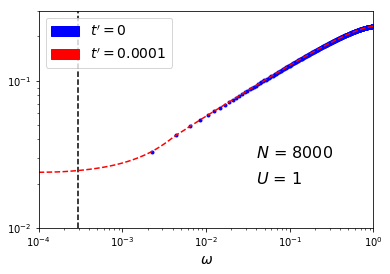

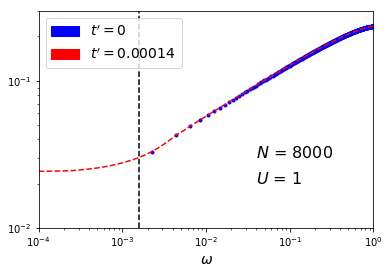

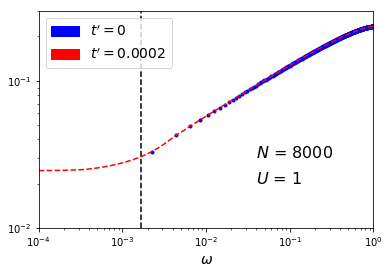

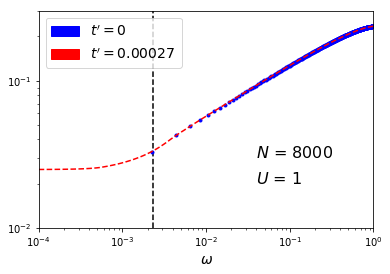

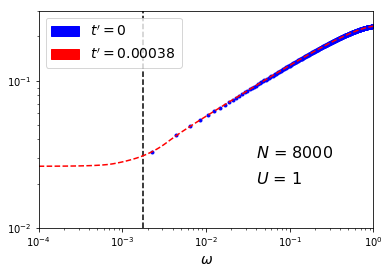

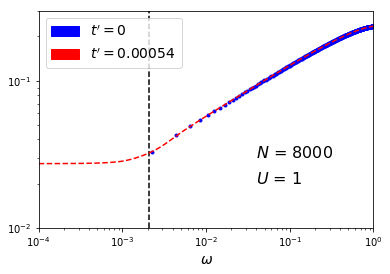

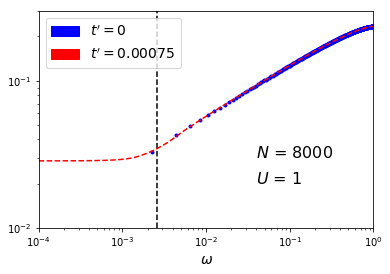

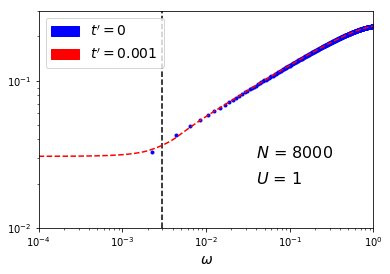

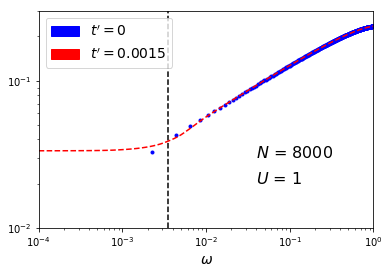

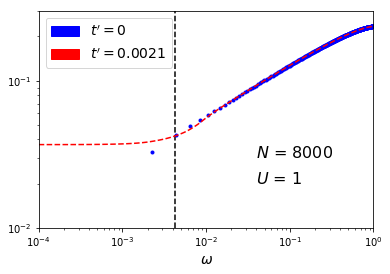

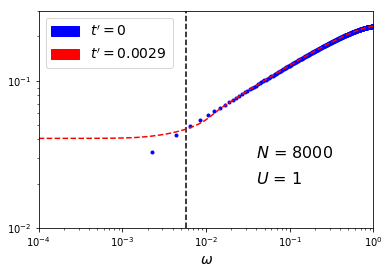

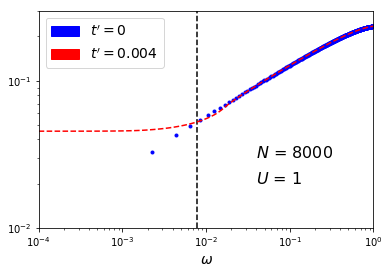

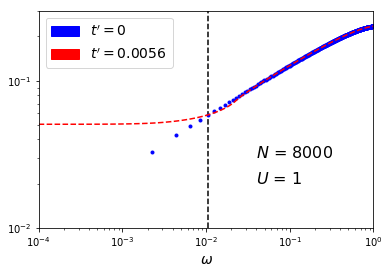

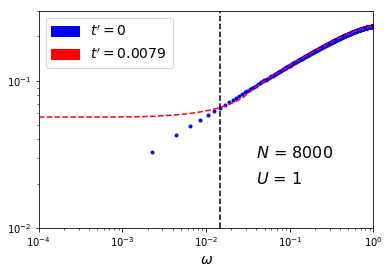

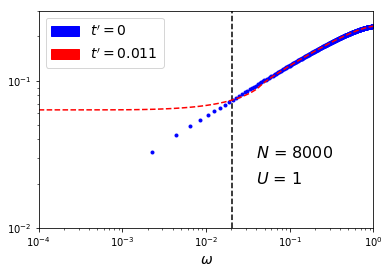

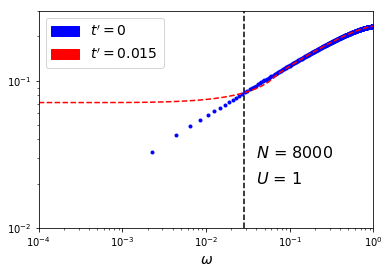

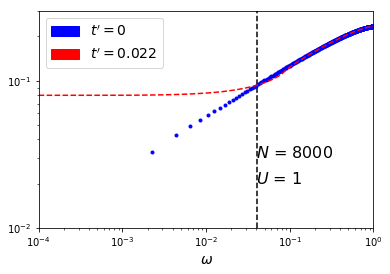

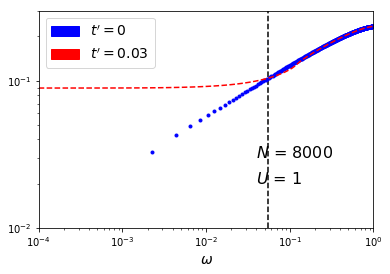

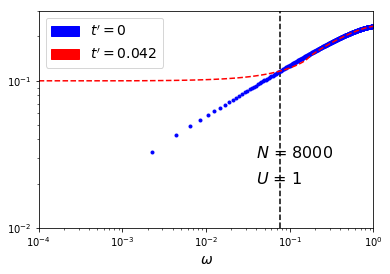

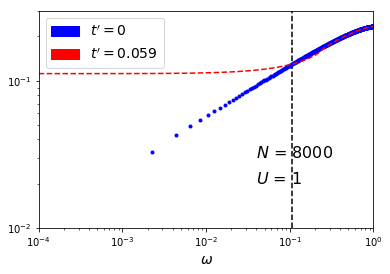

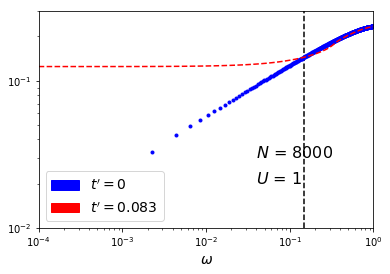

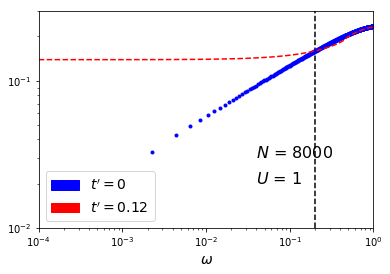

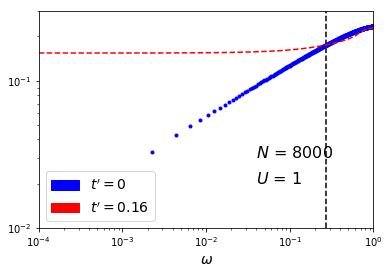

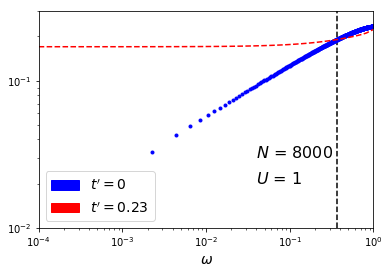

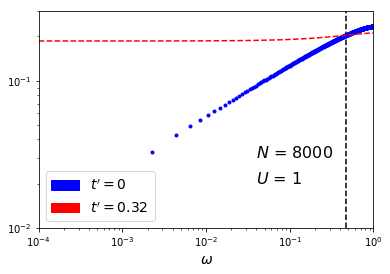

In [19]:
x_list = []
for Index in range(25):
    t = t_array_8000[Index]
    Omegas = Big_Plotting_List_Omegas[Index]
    LDOS = Big_Plotting_List_LDOS[Index]
    
    def Red(omega):
        if(omega<Omegas[0] or omega>Omegas[-1]):
            return 0
        for i in range(len(Omegas)-1):
            if(Omegas[i]<=omega and Omegas[i+1]>omega):
                return LDOS[i] + (LDOS[i+1]-LDOS[i])*(omega-Omegas[i])/(Omegas[i+1]-Omegas[i])
    
    def Blue(omega):
        O = Epsilon_N8000_U1[0]
        L = Plotpoints_N8000_U1[0]
        if(omega<O[0] or omega>O[-1]):
            return 0
        for i in range(len(O)-1):
            if(O[i]<=omega and O[i+1]>omega):
                return L[i] + (L[i+1]-L[i])*(omega-O[i])/(O[i+1]-O[i])

    xs = np.logspace(-3.95,0,2000)
    x_0 = 0
    for i in range(len(xs)):
        x = xs[i]
        y = Red(x)-Blue(x)
        
        if(y<0):
            x_0 = x
            break
    x_list.append(x_0)
    plt.vlines(x_0,0.01,0.3,"black",linestyle = "--")
    

    plt.plot(Epsilon_N8000_U1[0],Plotpoints_N8000_U1[0],"b.")
    plt.plot(Omegas,LDOS,"red",linestyle = "--")

    plt.xlim(10**-4,1)
    plt.ylim(10**-2,0.3)
    plt.xscale("log")
    plt.yscale("log")

    plt.text(0.04,0.03,r"$N$ = 8000".format(t),fontsize = 16)
    plt.text(0.04,0.02,r"$U$ = 1".format(t),fontsize = 16)

    plt.xlabel("$\omega$",fontsize = 14)

    Blau = mpat.Patch(color = "blue",label = r"$t^\prime = 0$")
    Rot = mpat.Patch(color = "red",label = "$t^\prime = {:.2}$".format(t))

    plt.legend(handles = [Blau,Rot],fontsize = 14)
    plt.show()

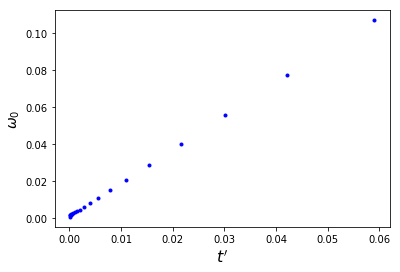

In [32]:
plt.plot(t_array_8000[:-5],x_list[:-5],"b.")
plt.xlabel(r"$t^\prime$",fontsize = 16)
plt.ylabel(r"$\omega_0$",fontsize = 14)
plt.show()

In [14]:
LDOS_Array8000_U01_MuU = np.load("LDOS_Array8000_U01_MuU.npy")
LDOS_Array8000_U025_MuU = np.load("LDOS_Array8000_U025_MuU.npy")
LDOS_Array8000_U05_MuU = np.load("LDOS_Array8000_U05_MuU.npy")
LDOS_Array8000 = np.load("LDOS_Array8000.npy")

LDOS_Array8000_U0_MuU = np.load("LDOS_Array8000_U0_MuU.npy")



In [15]:
LDOS_Array1000 = []
LDOS_Array1000_U01 = []
LDOS_Array1000_U02 = []
LDOS_Array1000_U03 = []
LDOS_Array1000_U05 = []
LDOS_Array1000_U07 = []
LDOS_Array1000_U00 = []


'''for t in t_array:
    data = np.load("Data/Sigma_Cluster_t{}_N1000_2ndOrderTrunc.npy".format(t))[-1,:]
    LDOS_Array1000.append(Plotit_with_k(data,t,1000,Quickreturn = True))


for t in t_array_small:
    data = np.load("Data/Sigma_Cluster_t{}_N1000_U0.1_2ndOrderTrunc.npy".format(t))[-1,:]
    LDOS_Array1000_U01.append(Plotit_with_k(data,t,1000,Quickreturn = True))  
for t in t_array_small:
    data = np.load("Data/Sigma_Cluster_t{}_N1000_U0.2_2ndOrderTrunc.npy".format(t))[-1,:]
    LDOS_Array1000_U02.append(Plotit_with_k(data,t,1000,Quickreturn = True))
for t in t_array_small:
    data = np.load("Data/Sigma_Cluster_t{}_N1000_U0.3_2ndOrderTrunc.npy".format(t))[-1,:]
    LDOS_Array1000_U03.append(Plotit_with_k(data,t,1000,Quickreturn = True))
for t in t_array_small:
    data = np.load("Data/Sigma_Cluster_t{}_N1000_U0.5_2ndOrderTrunc.npy".format(t))[-1,:]
    LDOS_Array1000_U05.append(Plotit_with_k(data,t,1000,Quickreturn = True))
for t in t_array_small:
    data = np.load("Data/Sigma_Cluster_t{}_N1000_U0.7_2ndOrderTrunc.npy".format(t))[-1,:]
    LDOS_Array1000_U07.append(Plotit_with_k(data,t,1000,Quickreturn = True))
for t in t_array:
    data = np.load("Data/Sigma_Cluster_t{}_N1000_U0.0_2ndOrderTrunc.npy".format(t))[-1,:]
    LDOS_Array1000_U00.append(Plotit_with_k(data,t,1000,Quickreturn = True))      
    
LDOS_Array1000 = np.array(LDOS_Array1000)
LDOS_Array1000_U01 = np.array(LDOS_Array1000_U01)
LDOS_Array1000_U02 = np.array(LDOS_Array1000_U02)
LDOS_Array1000_U03 = np.array(LDOS_Array1000_U03)
LDOS_Array1000_U05 = np.array(LDOS_Array1000_U05)
LDOS_Array1000_U07 = np.array(LDOS_Array1000_U07)
LDOS_Array1000_U00 = np.array(LDOS_Array1000_U00)'''

LDOS_Array1000 = np.load("LDOS_Array1000.npy")
LDOS_Array1000_U01 = np.load("LDOS_Array1000_U01.npy")
LDOS_Array1000_U02 = np.load("LDOS_Array1000_U02.npy")
LDOS_Array1000_U03 = np.load("LDOS_Array1000_U03.npy")
LDOS_Array1000_U05 = np.load("LDOS_Array1000_U05.npy")
LDOS_Array1000_U07 = np.load("LDOS_Array1000_U07.npy")
LDOS_Array1000_U00 = np.load("LDOS_Array1000_U00.npy")

0.0


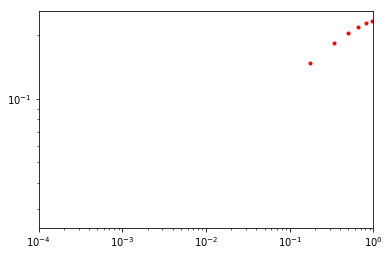

0.0


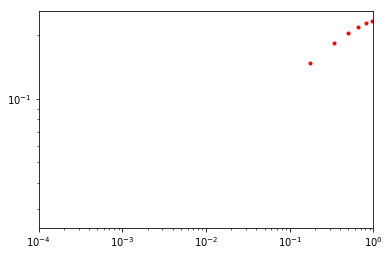

0.0


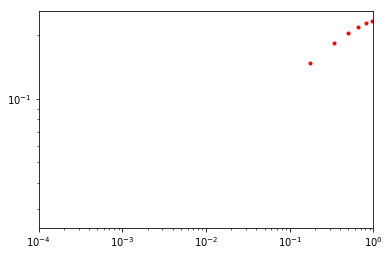

0.0


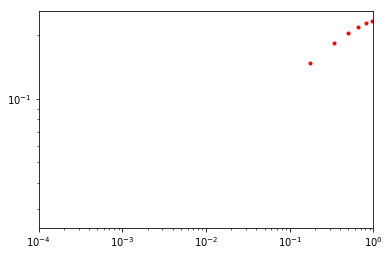

0.0


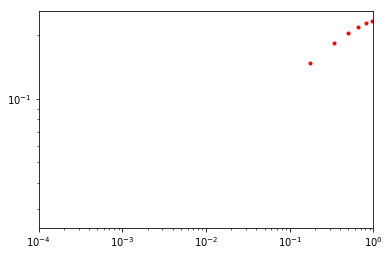

0.0


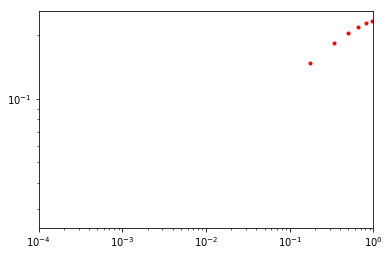

0.0


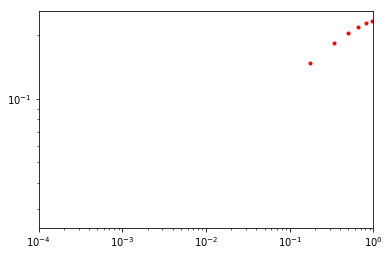

0.0


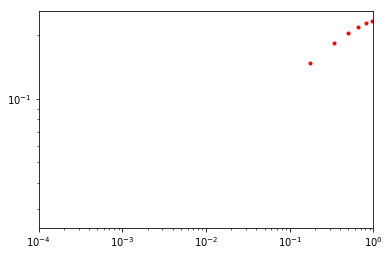

0.0


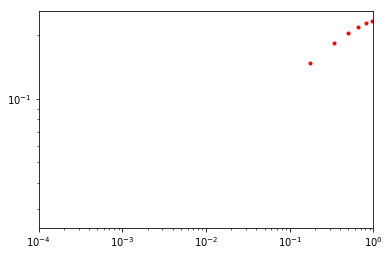

0.0


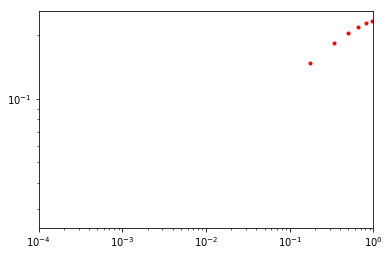

0.0


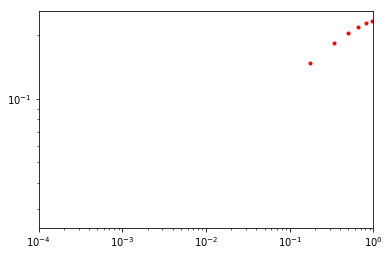

0.0


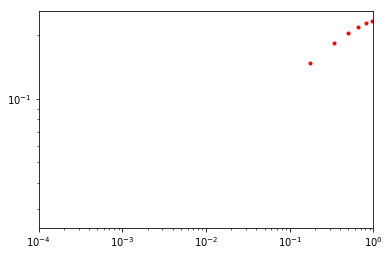

0.0


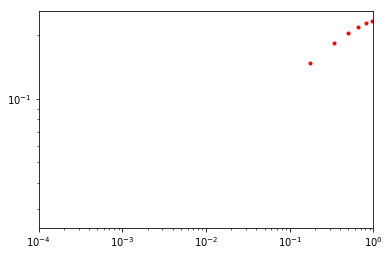

0.0


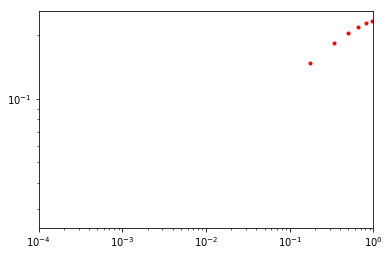

0.0


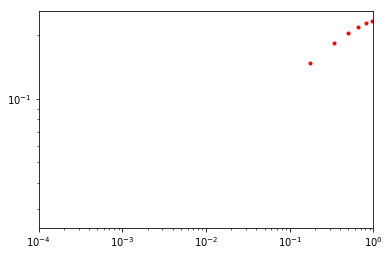

0.0


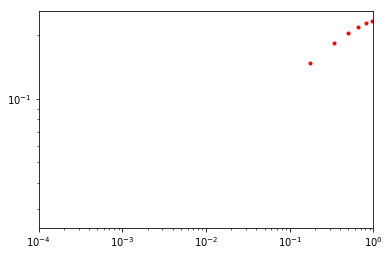

0.0


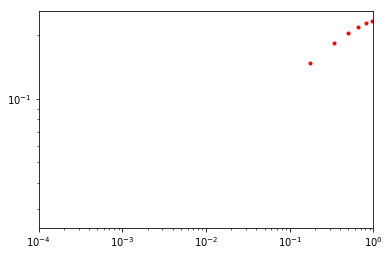

0.0


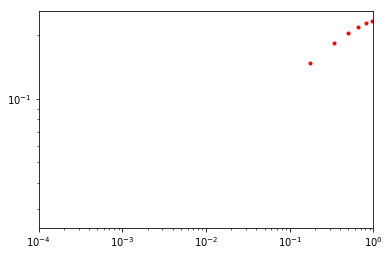

0.0


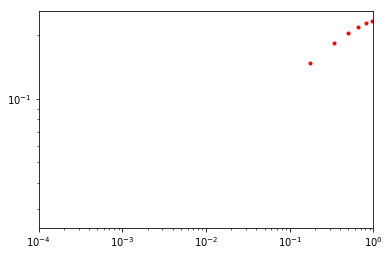

0.0


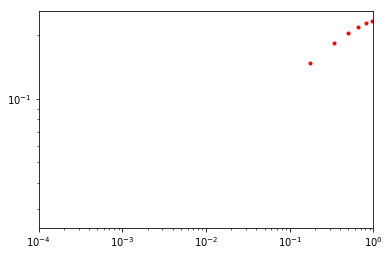

0.0


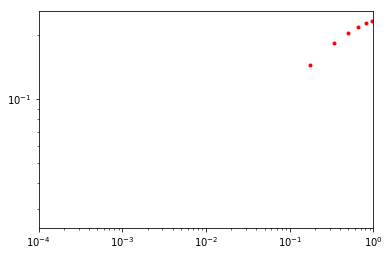

0.0


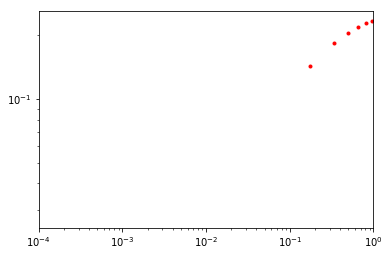

0.0


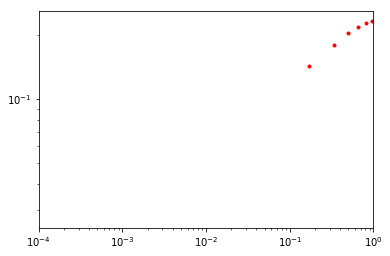

0.0


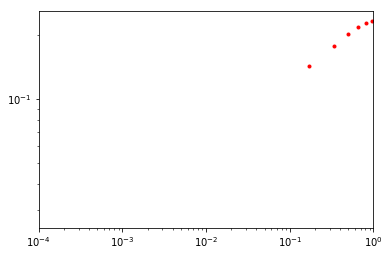

0.0


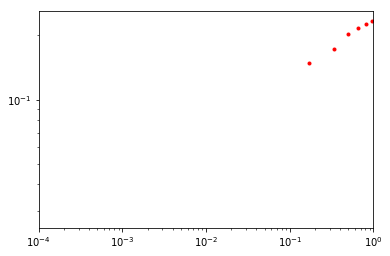

0.0


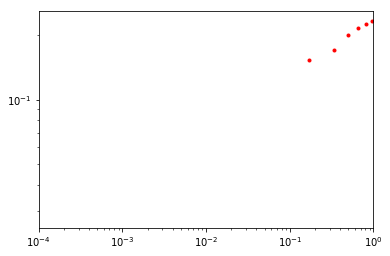

0.0


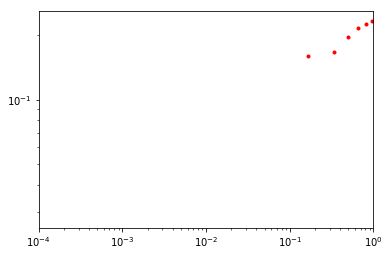

0.0


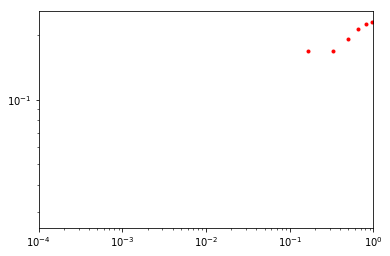

0.0


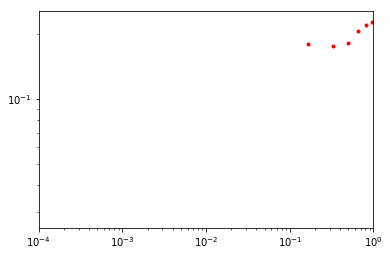

0.0


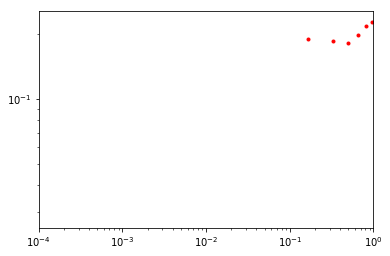

0.0


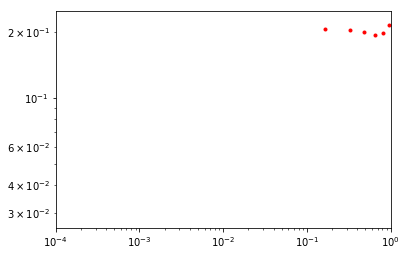

C:\Users\Robin\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.


0.0


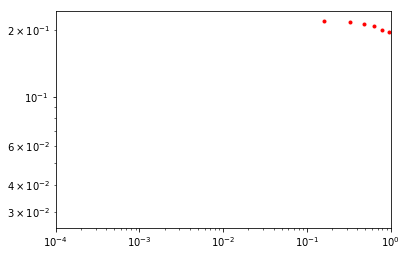

0.0


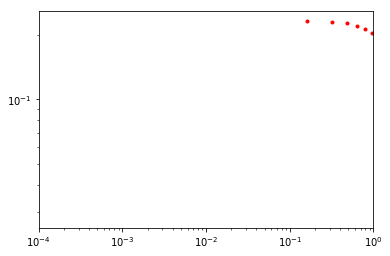

0.0


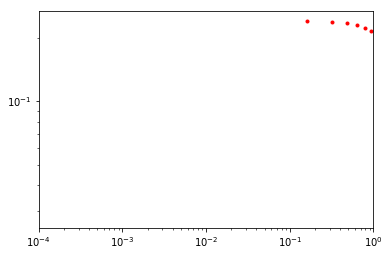

0.0


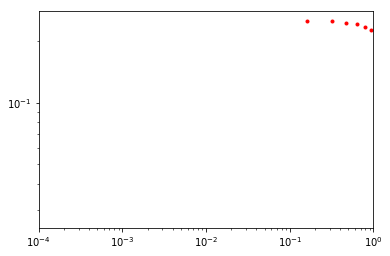

0.0


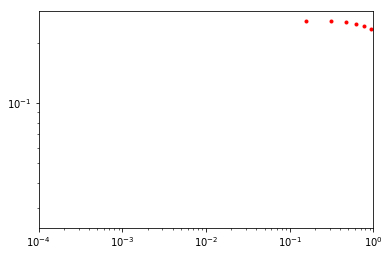

0.0


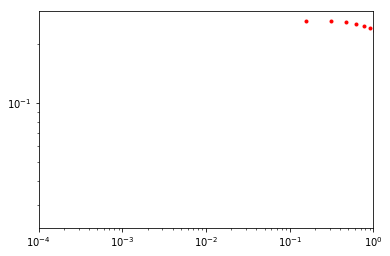

0.0


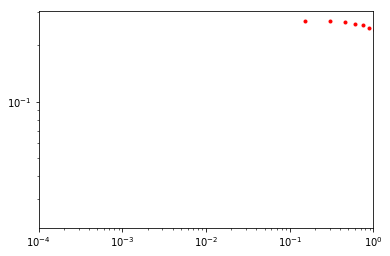

0.0


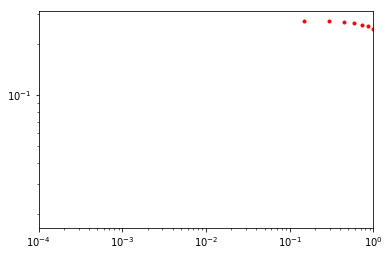

0.0


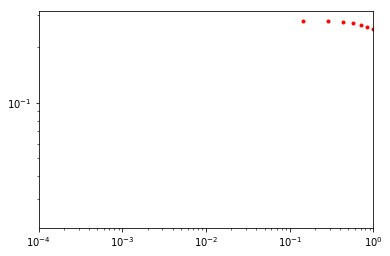

0.0


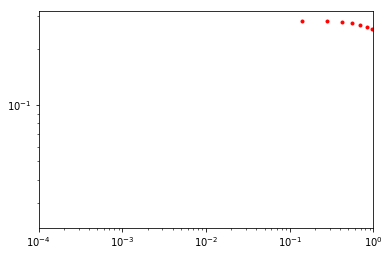

0.0


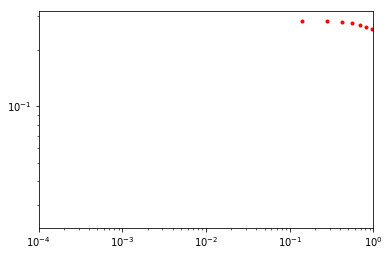

0.0


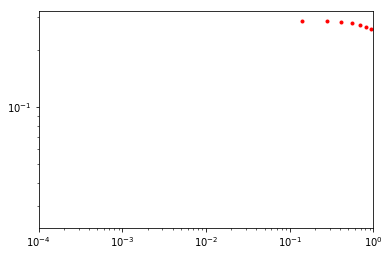

0.0


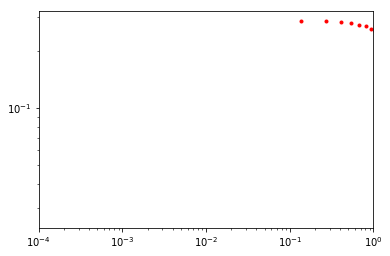

0.0


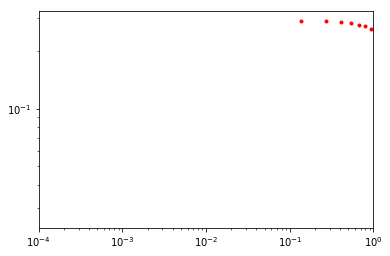

0.0


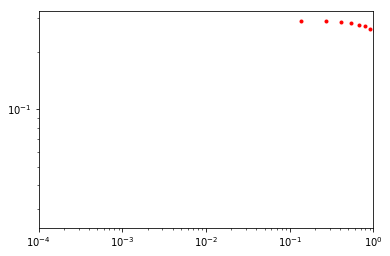

0.0


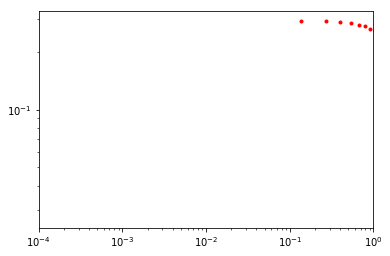

0.0


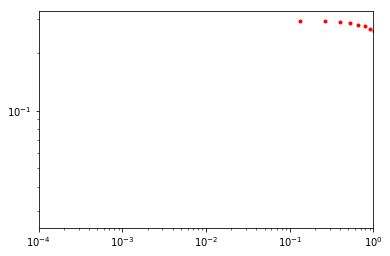

0.0


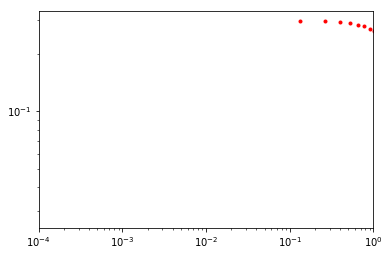

0.0


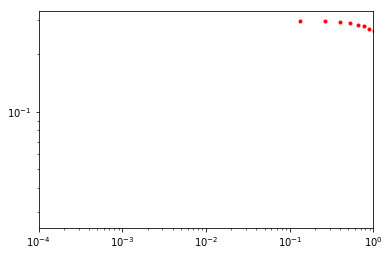

0.0


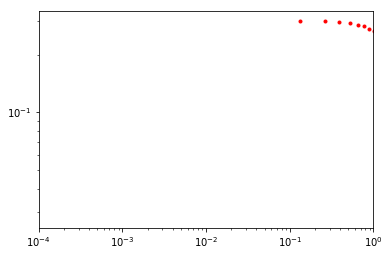

0.0


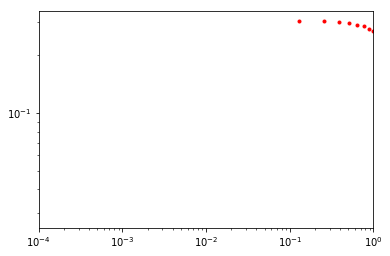

0.0


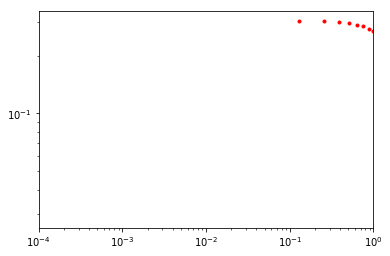

0.0


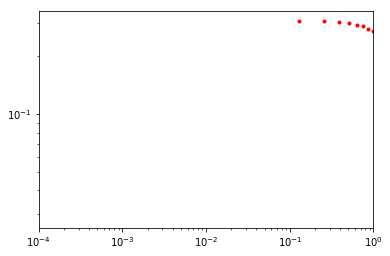

0.0


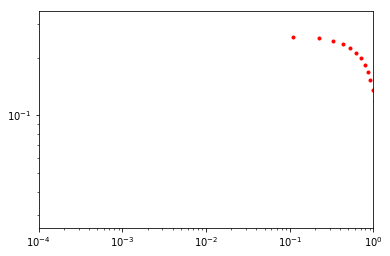

0.0


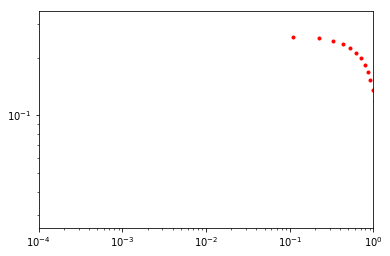

0.0


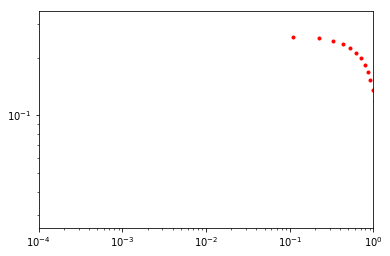

0.0


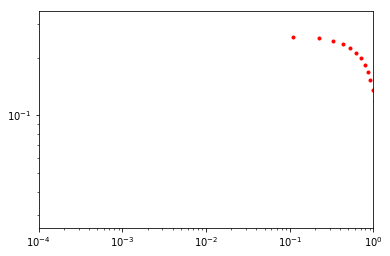

0.0


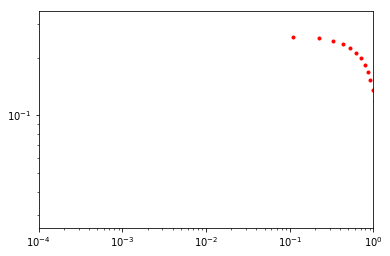

0.0


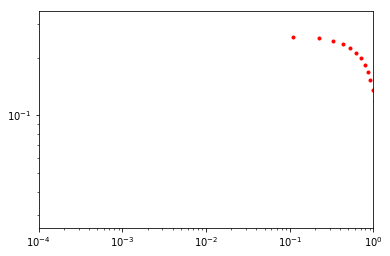

0.0


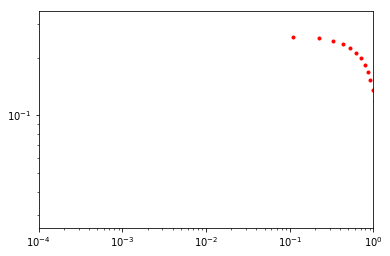

0.0


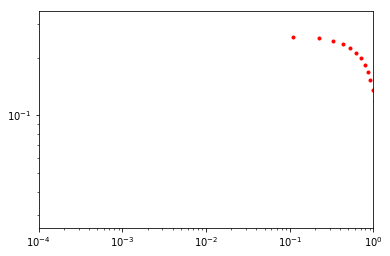

0.0


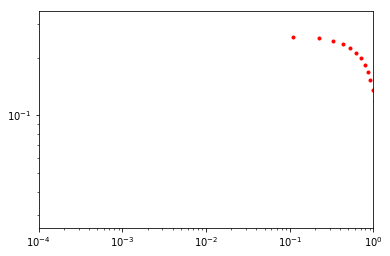

0.0


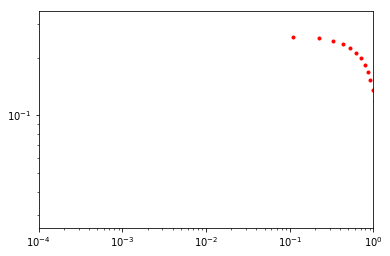

0.0


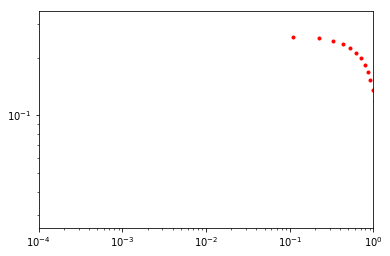

0.0


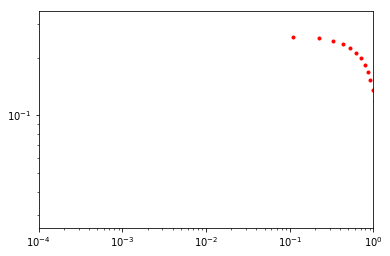

0.0


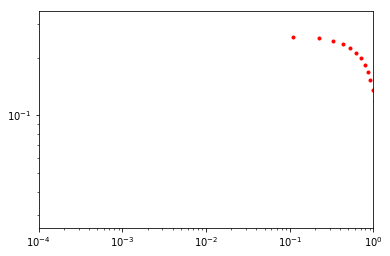

0.0


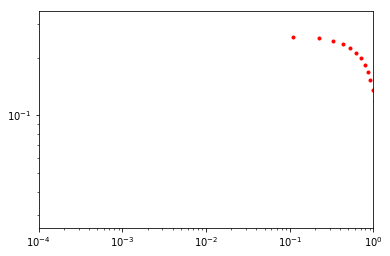

0.0


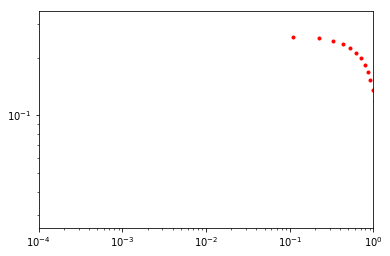

0.0


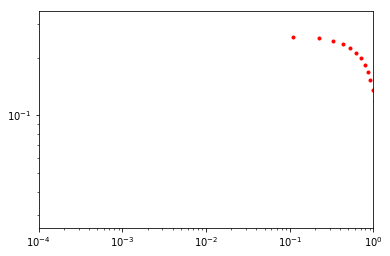

0.0


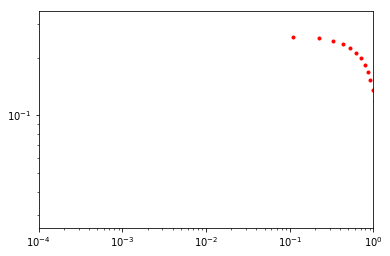

0.0


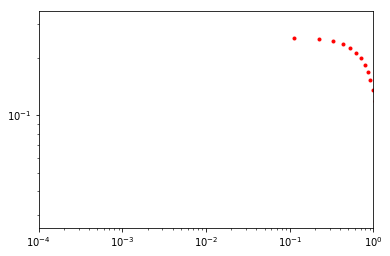

0.0


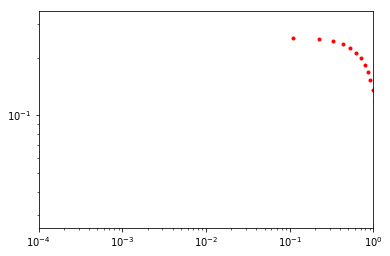

0.0


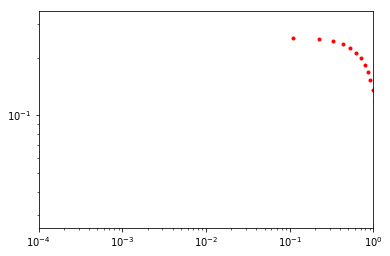

0.0


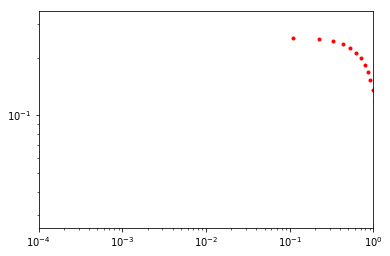

0.0


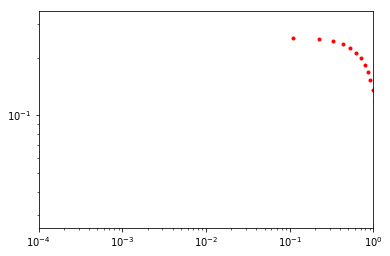

0.0


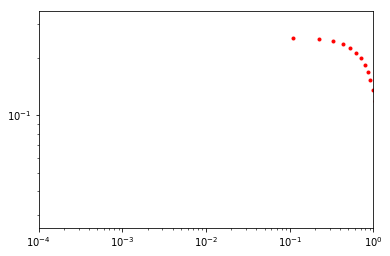

0.0


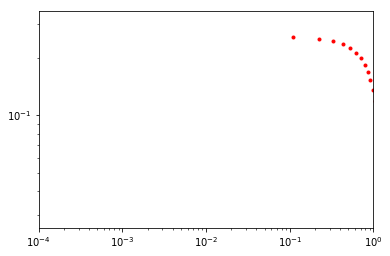

0.0


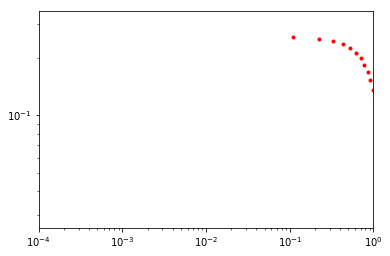

0.0


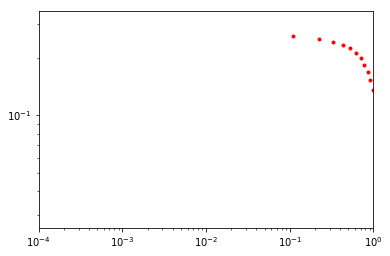

0.0


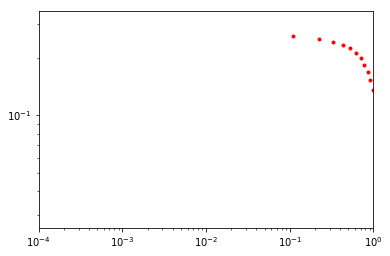

0.0


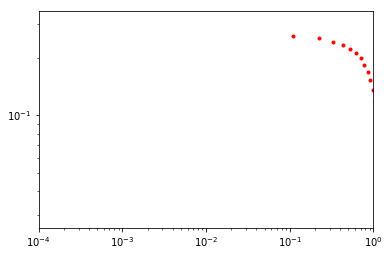

0.0


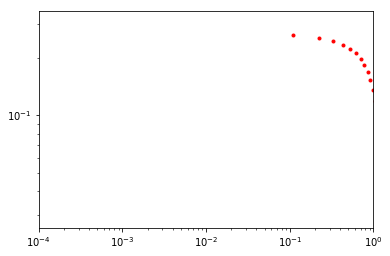

0.0


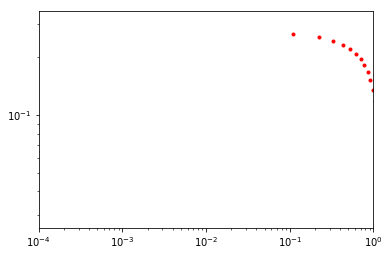

0.0


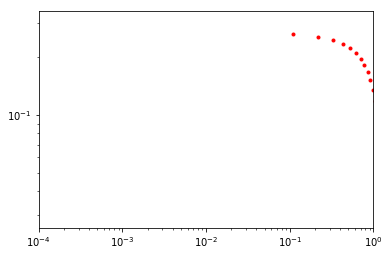

0.0


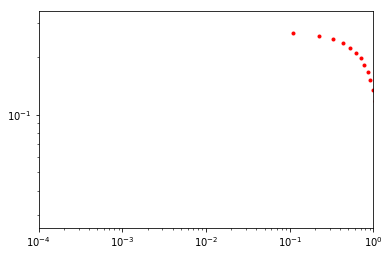

0.0


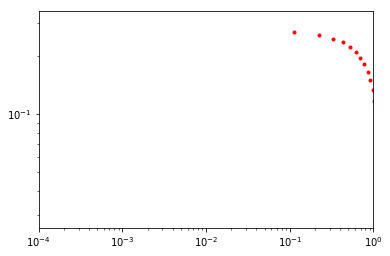

0.0


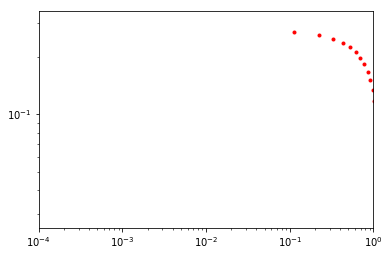

0.0


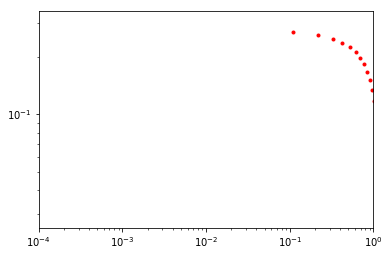

0.0


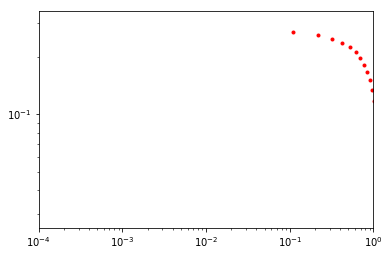

0.0


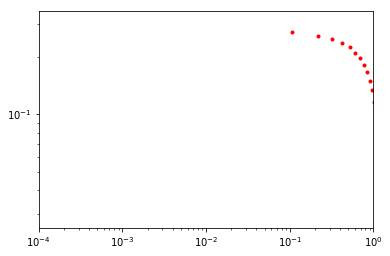

0.0


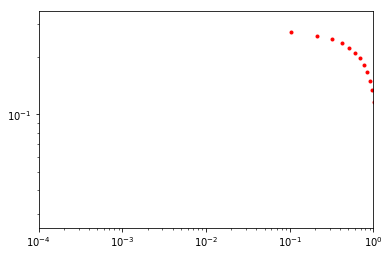

0.0


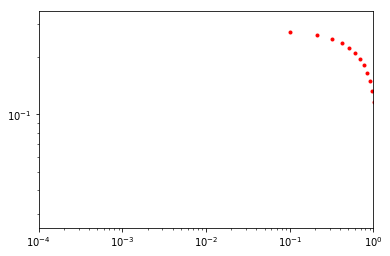

0.0


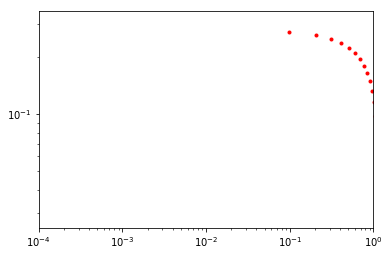

0.0


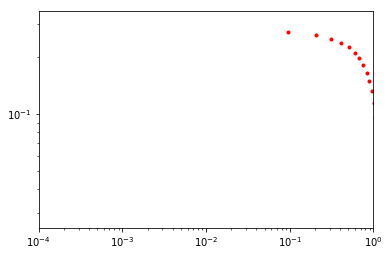

0.0


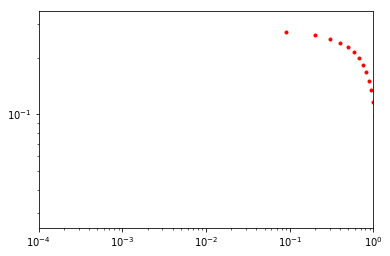

0.0


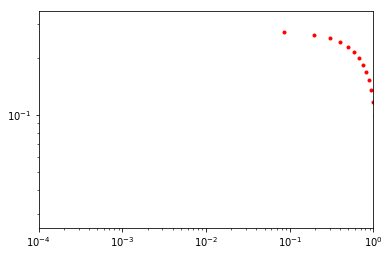

0.0


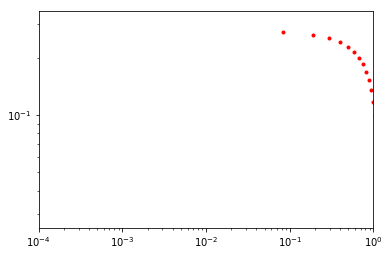

0.0


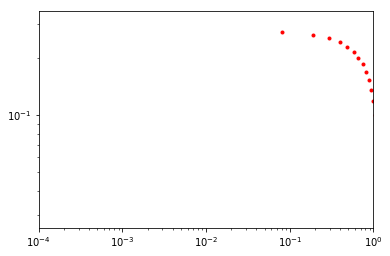

0.0


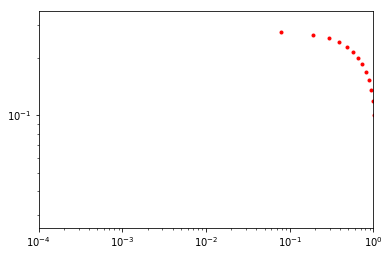

0.0


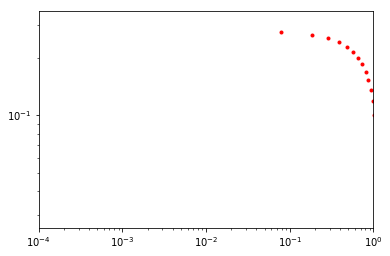

0.0


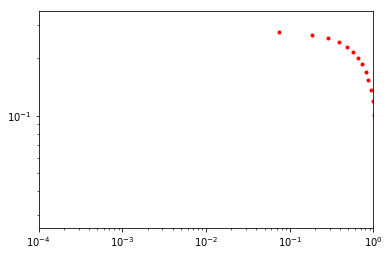

0.0


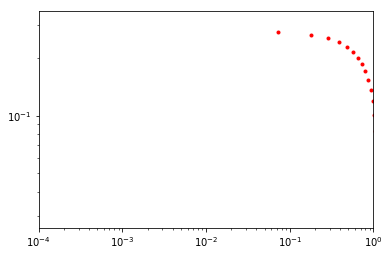

0.0


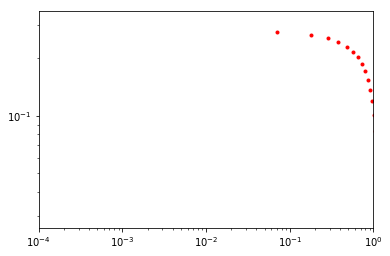

0.0


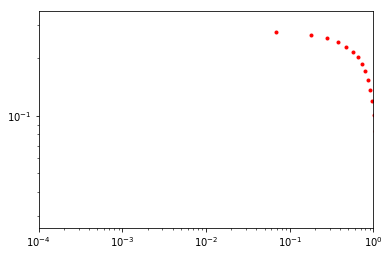

0.0


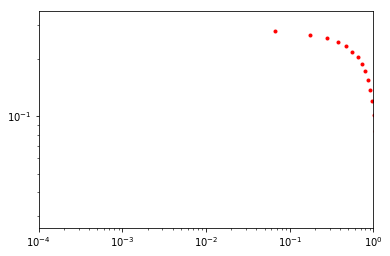

0.0


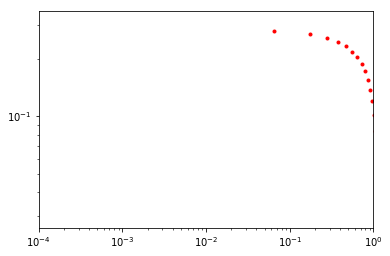

0.0


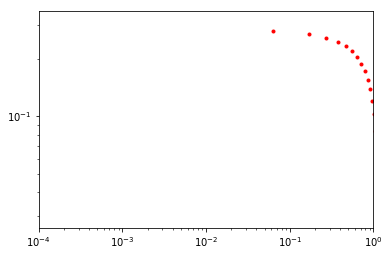

0.0


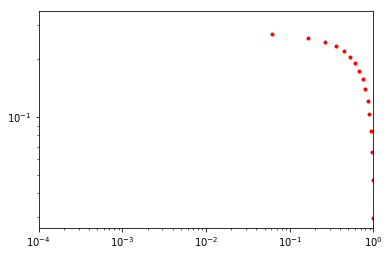

0.0


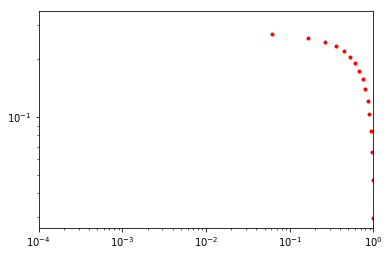

0.0


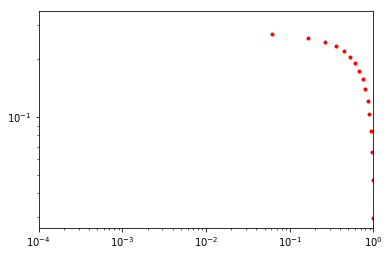

0.0


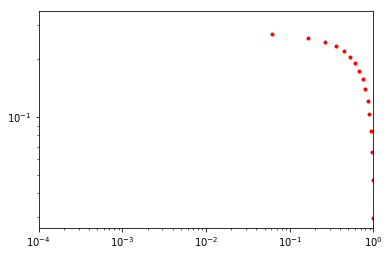

0.0


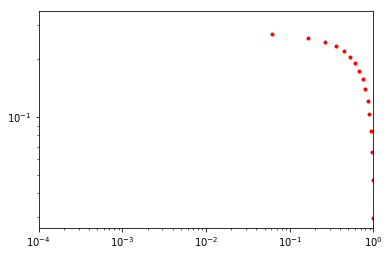

0.0


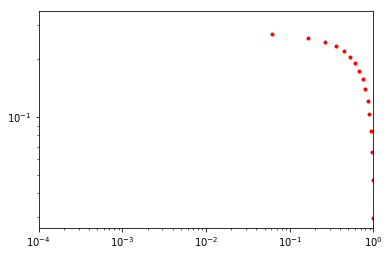

0.0


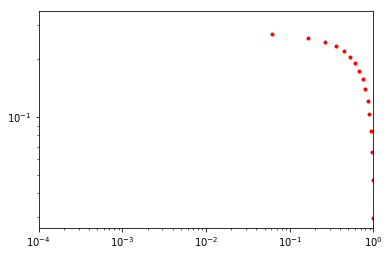

0.0


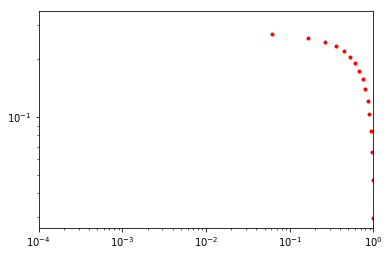

0.0


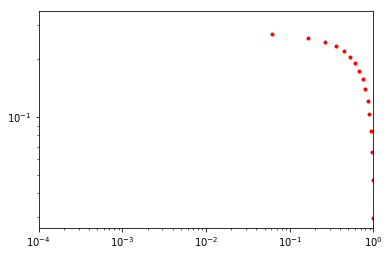

0.0


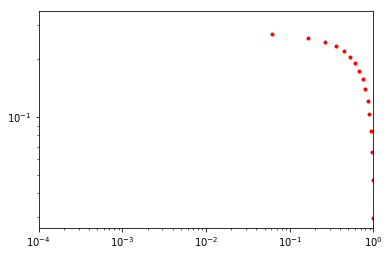

0.0


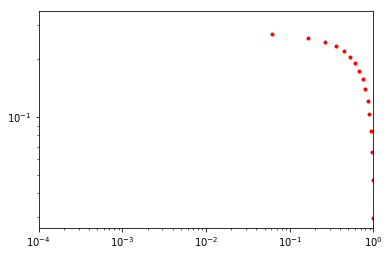

0.0


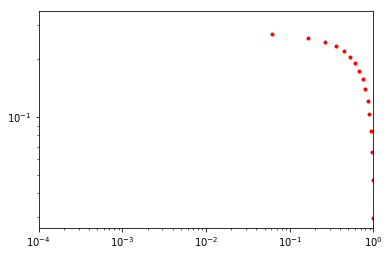

0.0


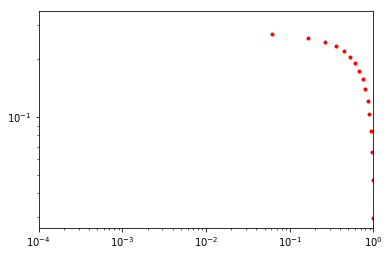

0.0


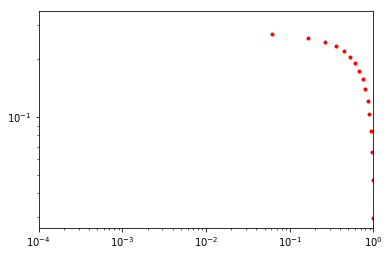

0.0


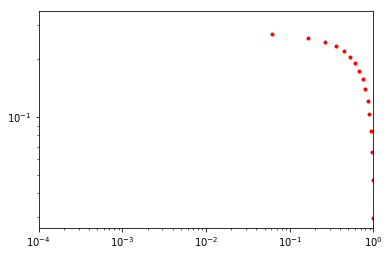

0.0


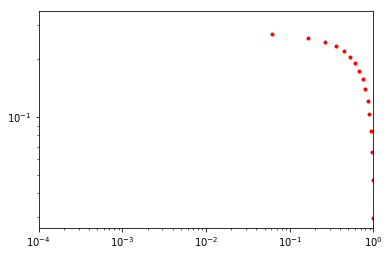

0.0


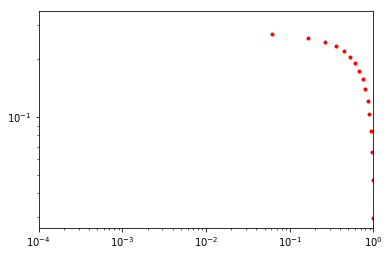

0.0


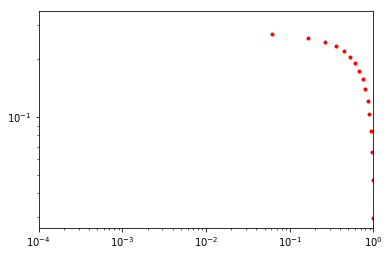

0.0


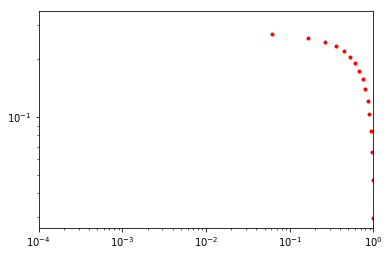

0.0


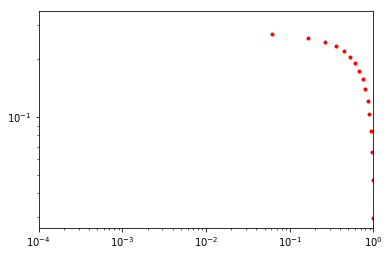

0.0


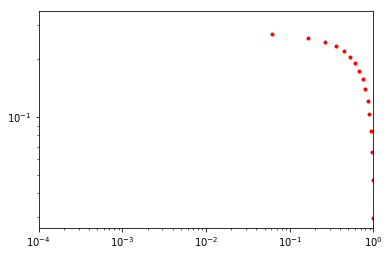

0.0


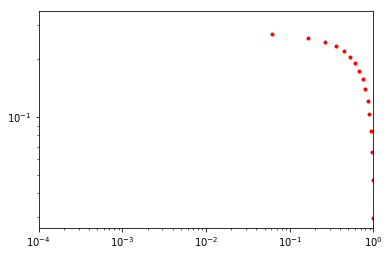

0.0


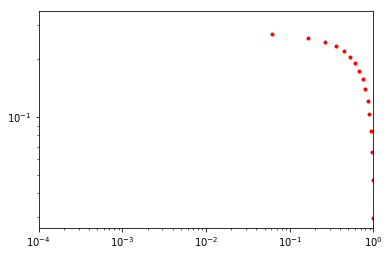

0.0


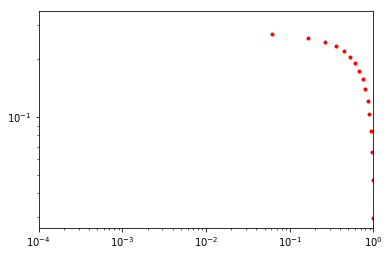

0.0


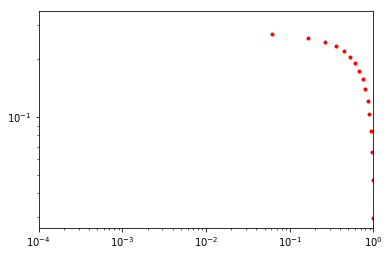

0.0


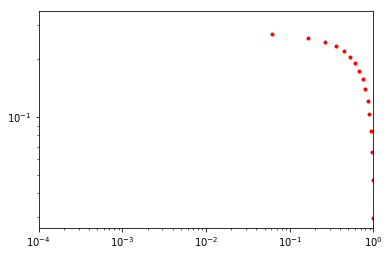

0.0


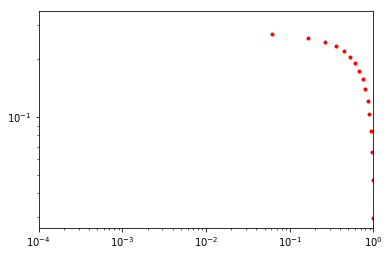

0.0


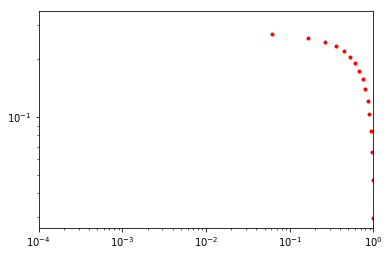

0.0


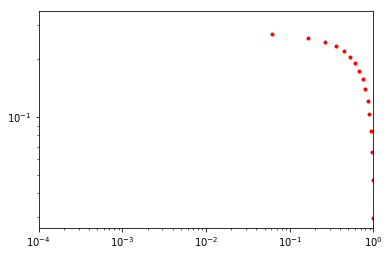

0.0


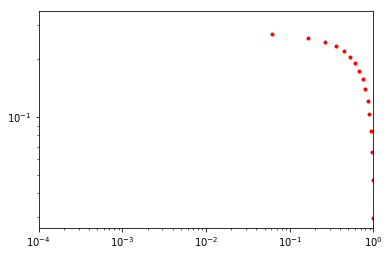

0.0


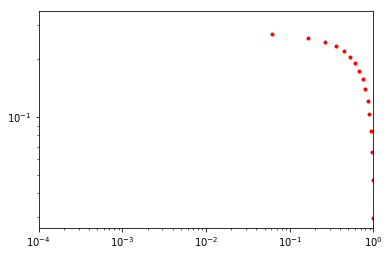

0.0


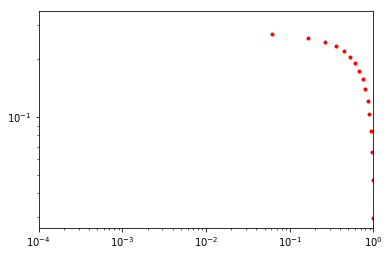

0.0


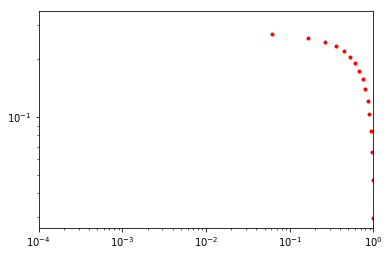

0.0


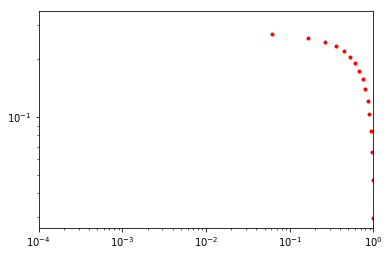

0.0


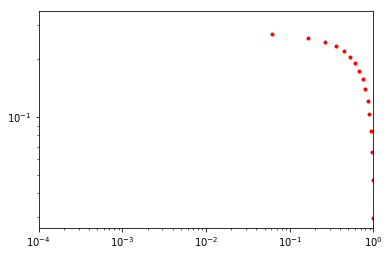

0.0


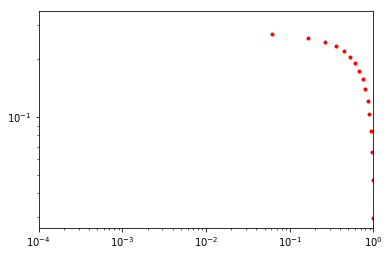

0.0


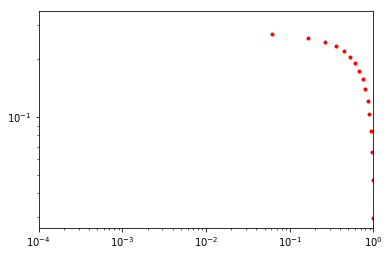

0.0


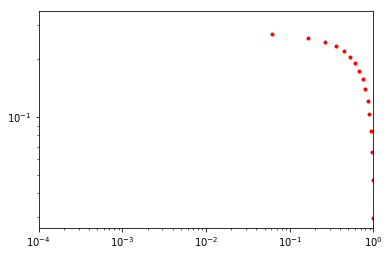

0.0


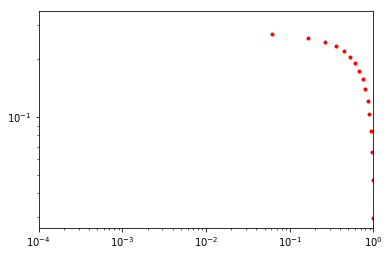

0.0


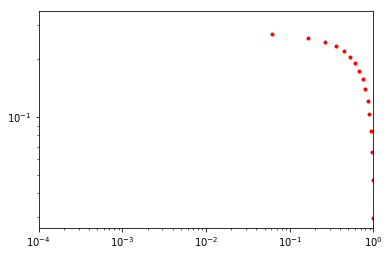

0.0


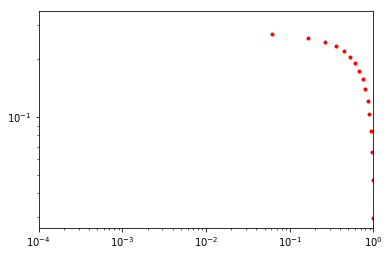

0.0


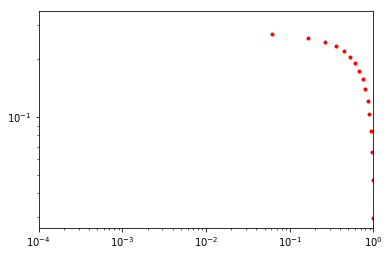

0.0


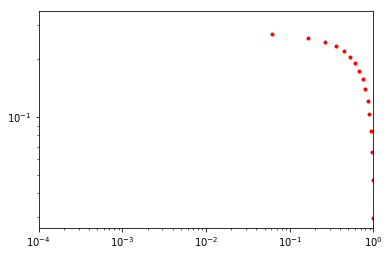

0.0


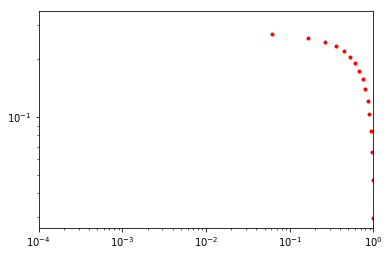

0.0


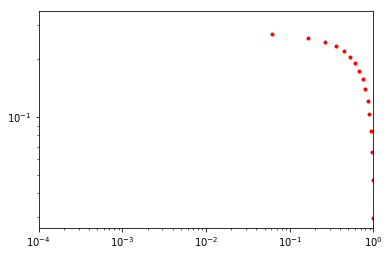

0.0


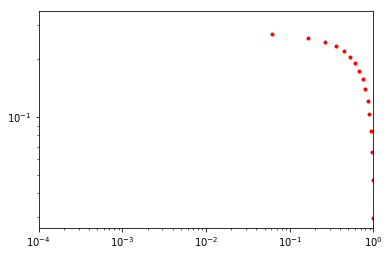

0.0


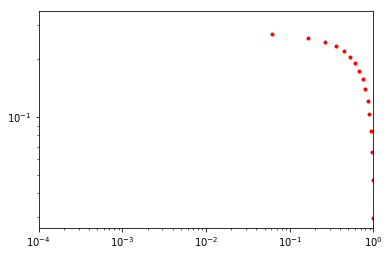

0.0


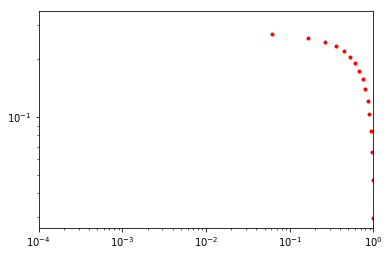

0.0


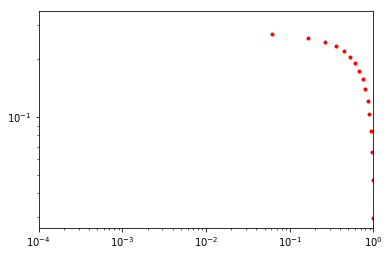

0.0


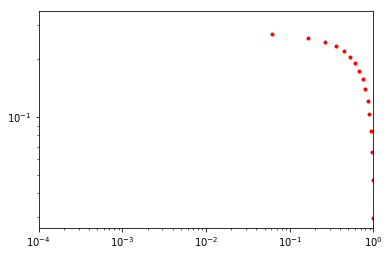

0.0


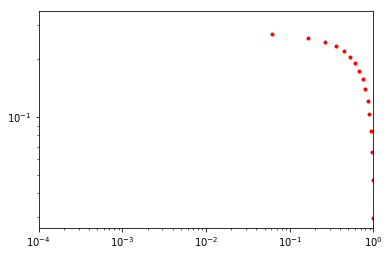

0.0


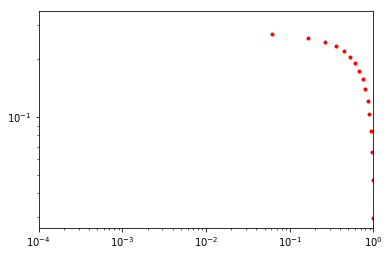

0.0


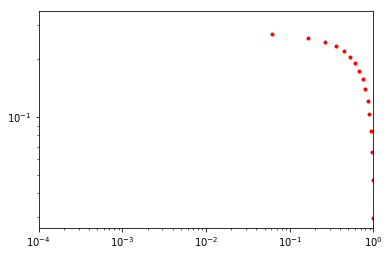

0.0


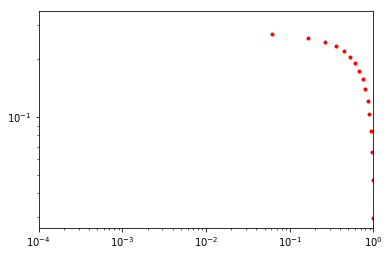

0.0


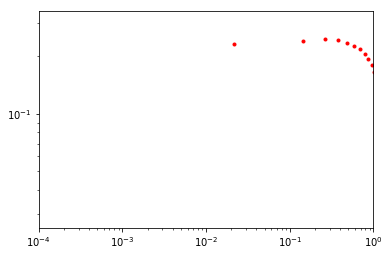

0.0


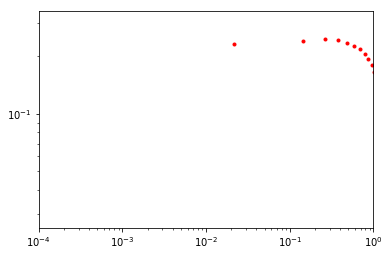

0.0


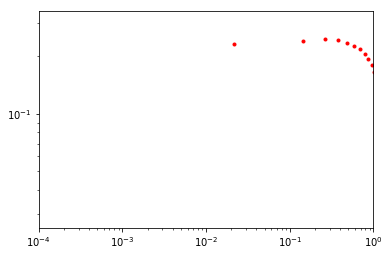

0.0


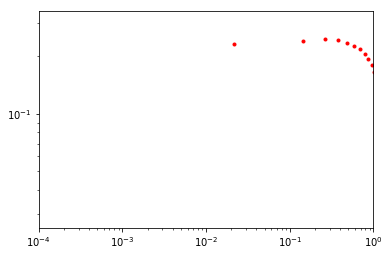

0.0


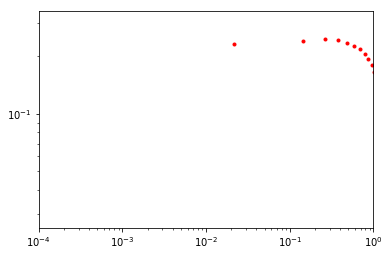

0.0


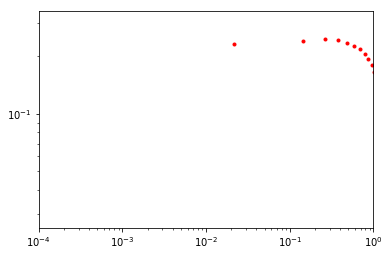

0.0


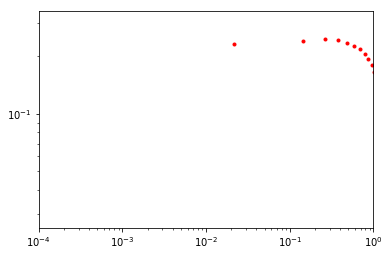

0.0


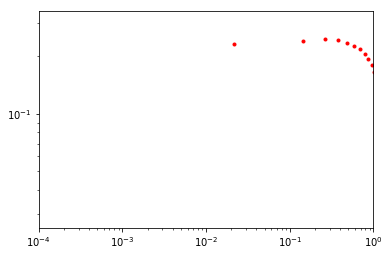

0.0


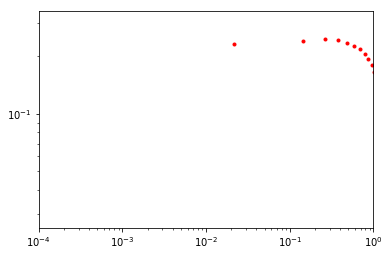

0.0


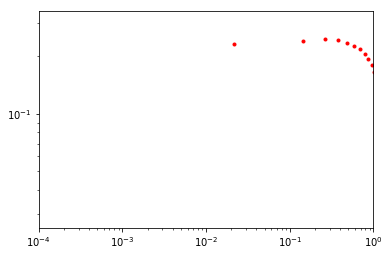

0.0


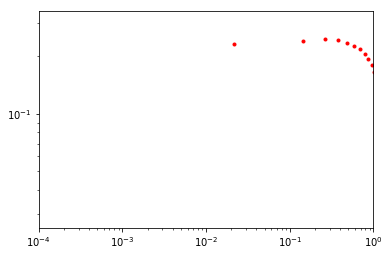

0.0


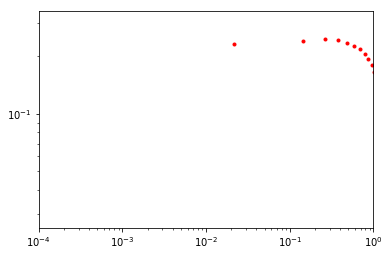

0.0


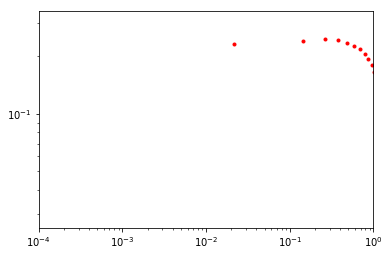

0.0


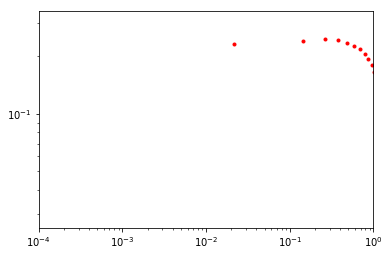

0.0


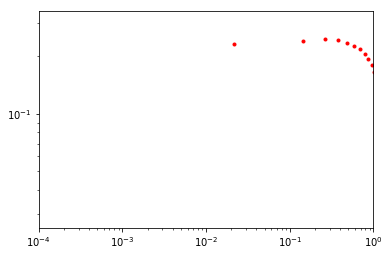

0.0


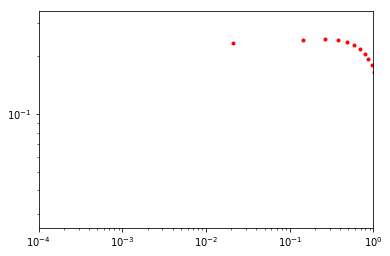

0.0


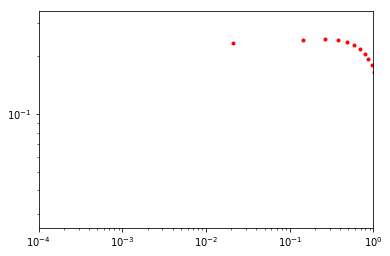

0.0


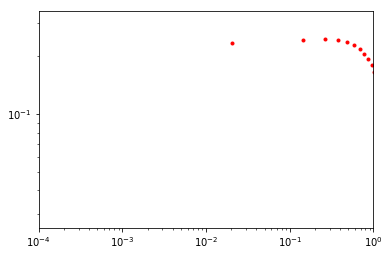

0.0


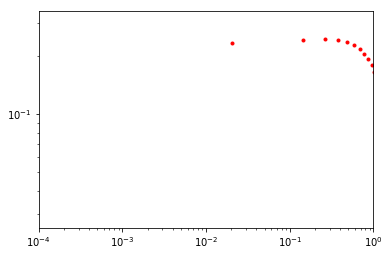

0.0


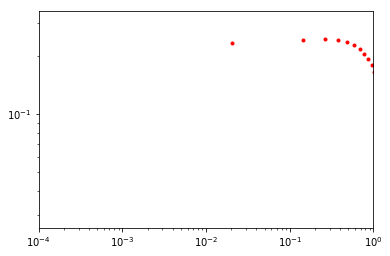

0.0


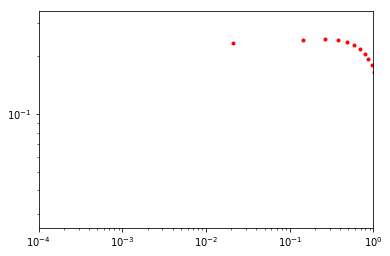

0.0


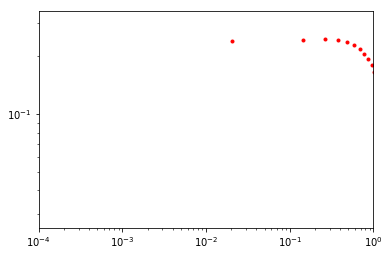

0.0


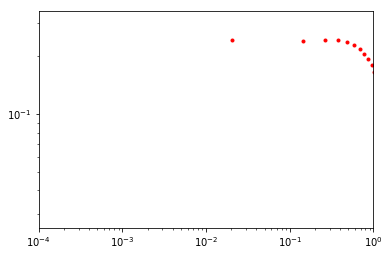

0.0


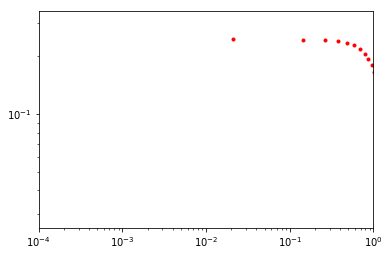

0.0


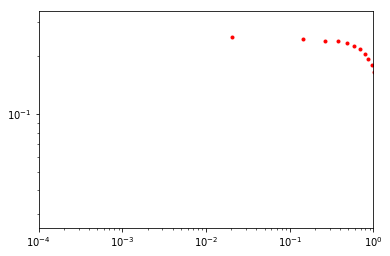

0.0


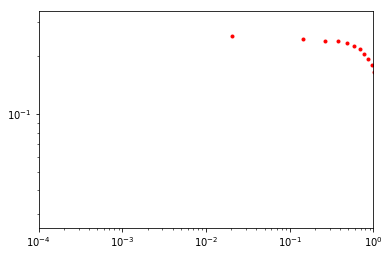

0.0


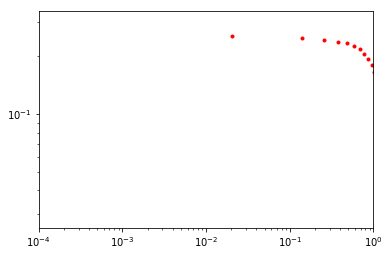

0.0


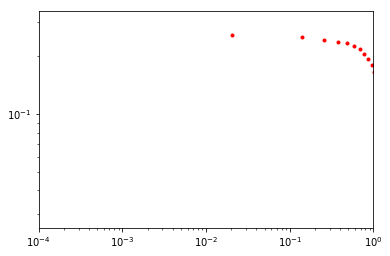

0.0


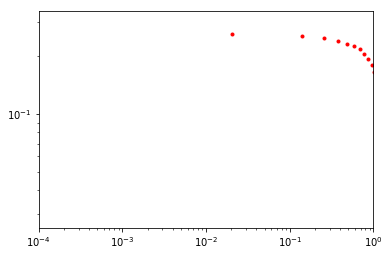

0.0


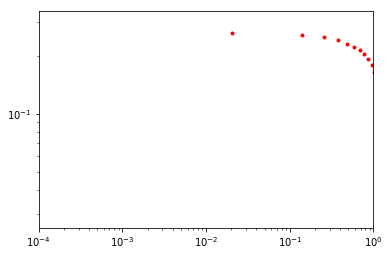

0.0


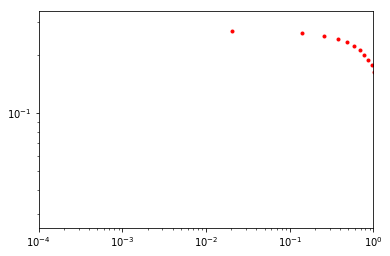

0.0


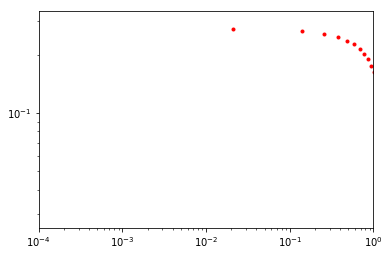

0.0


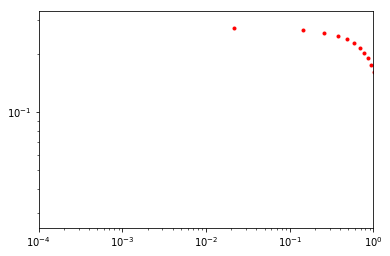

0.0


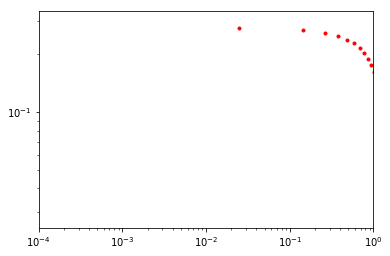

0.0


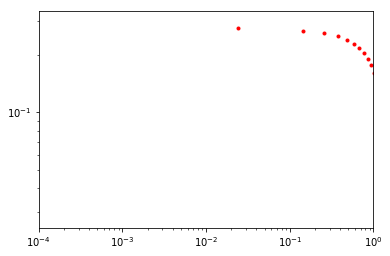

0.0


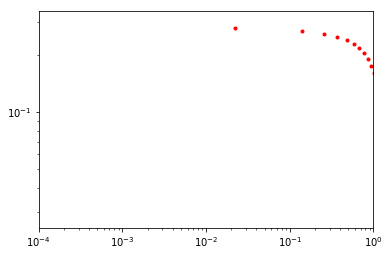

0.0


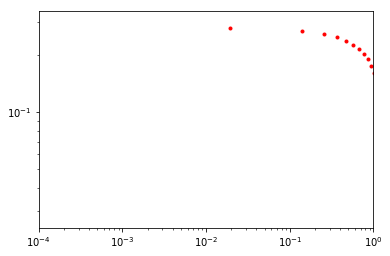

0.0


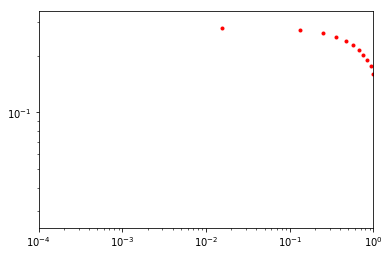

0.0


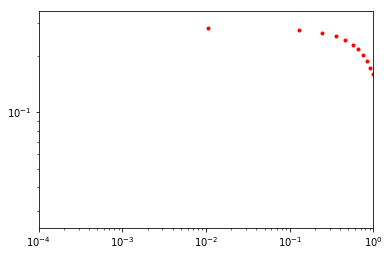

0.0


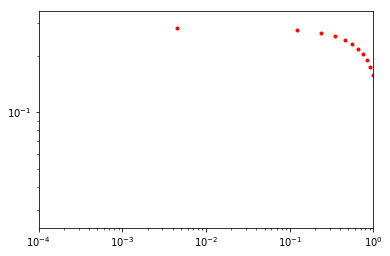

0.0


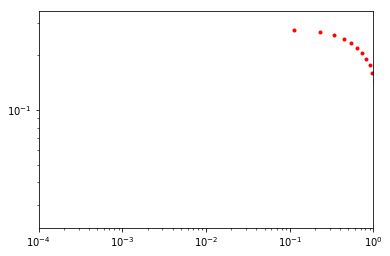

0.0


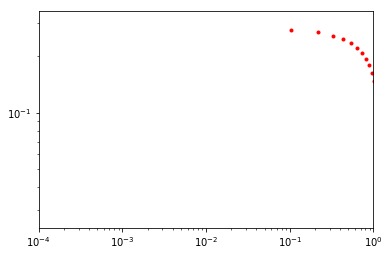

0.0


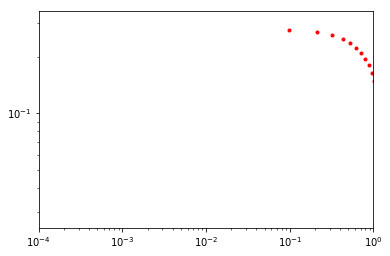

0.0


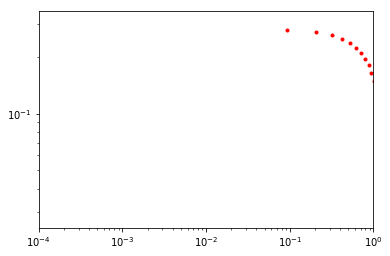

0.0


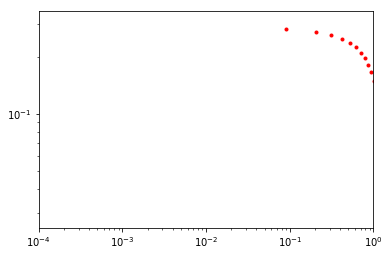

0.0


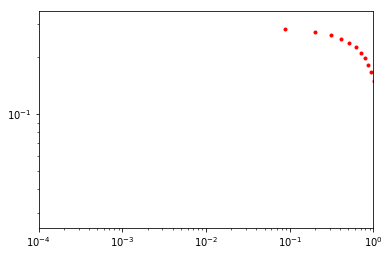

0.0


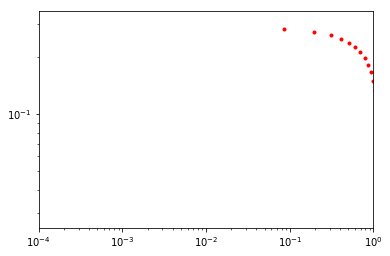

0.0


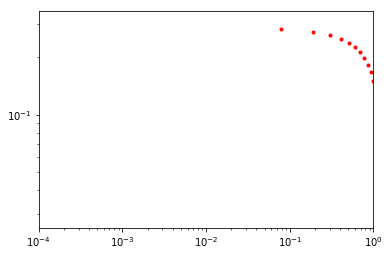

0.0


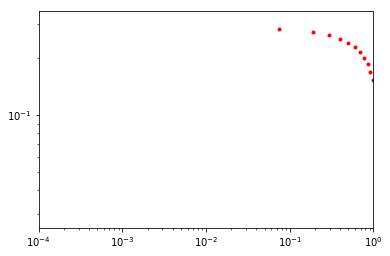

0.0


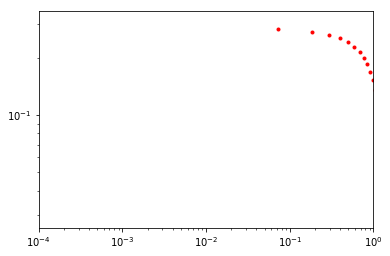

0.0


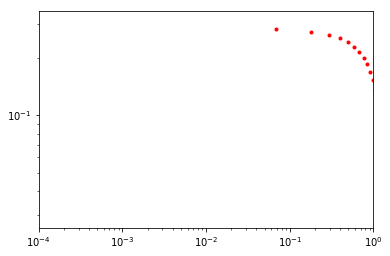

0.0


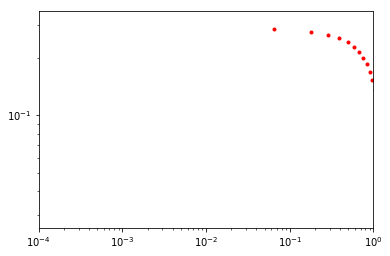

0.0


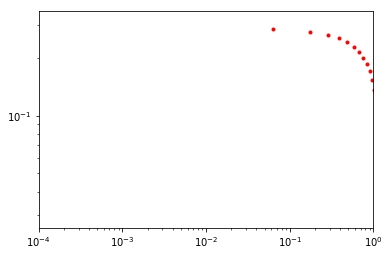

0.0


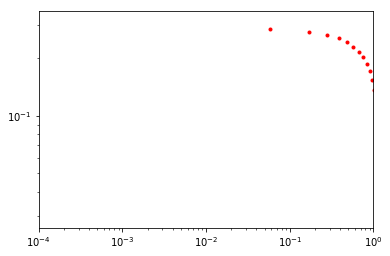

0.0


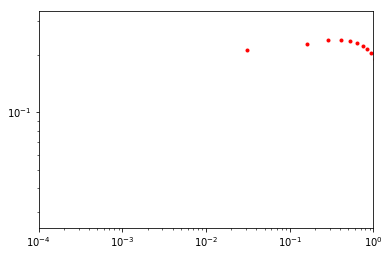

0.0


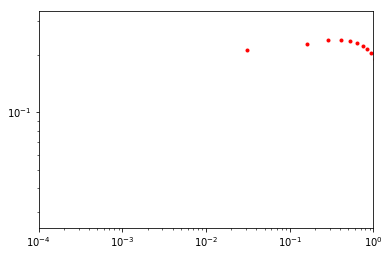

0.0


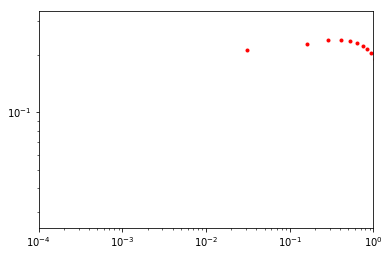

0.0


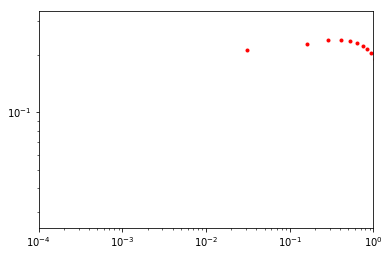

0.0


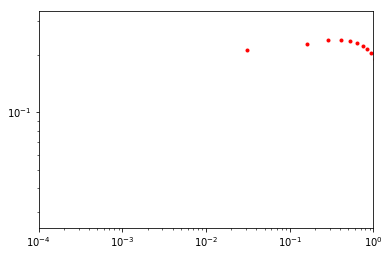

0.0


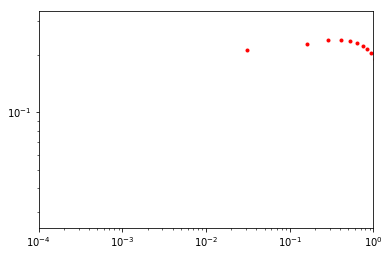

0.0


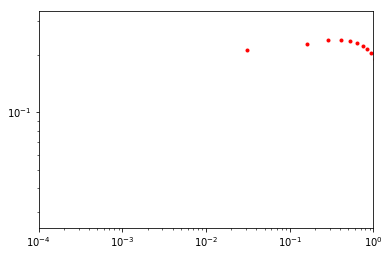

0.0


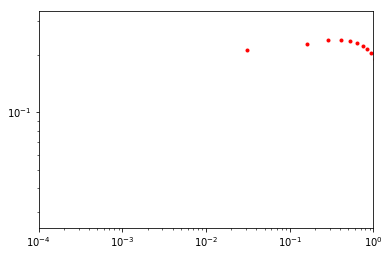

0.0


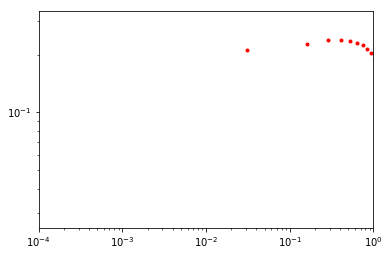

0.0


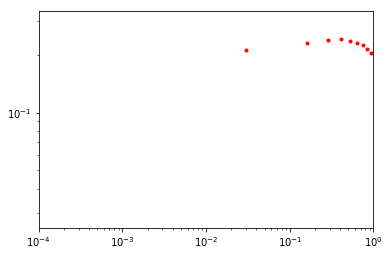

0.0


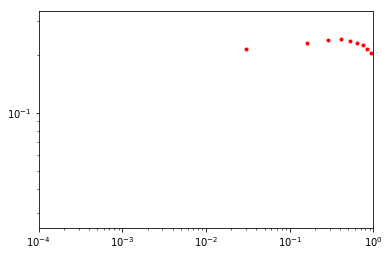

0.0


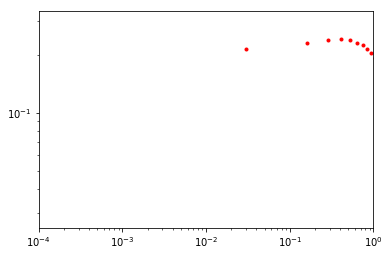

0.0


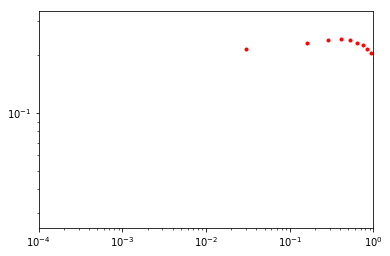

0.0


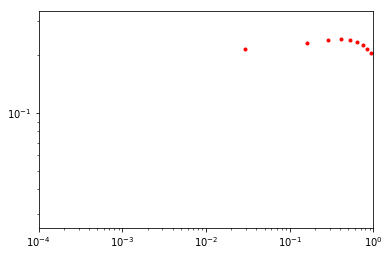

0.0


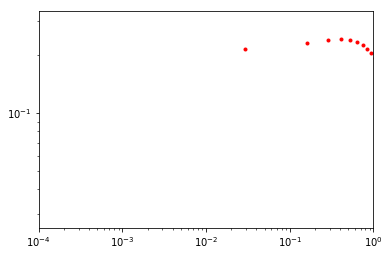

0.0


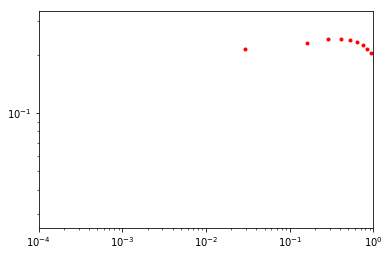

0.0


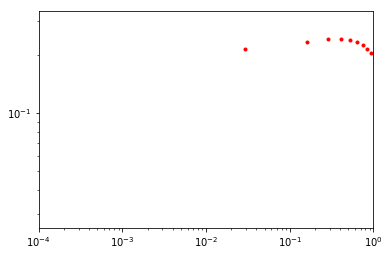

0.0


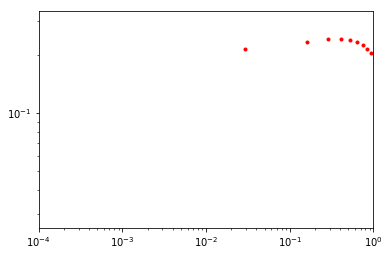

0.0


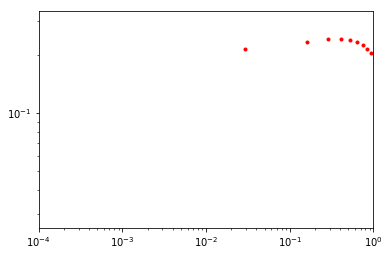

0.0


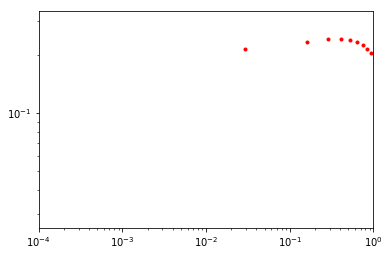

0.0


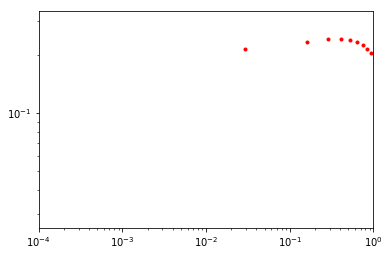

0.0


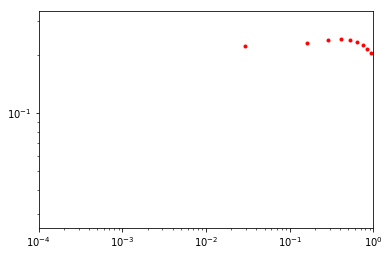

0.0


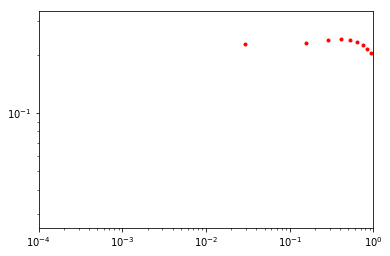

0.0


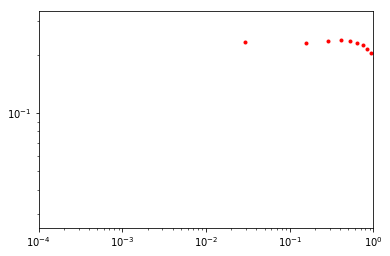

0.0


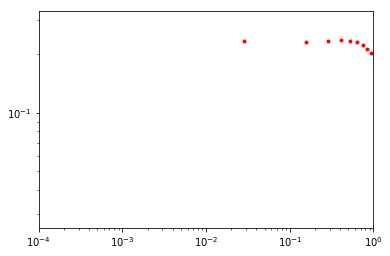

0.0


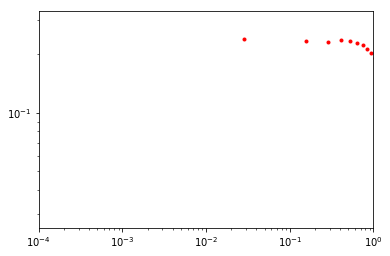

0.0


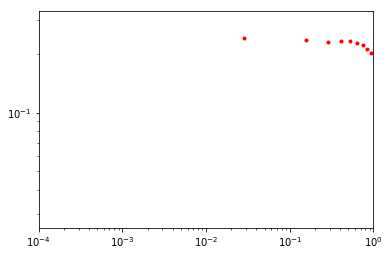

0.0


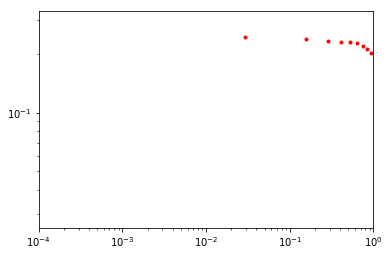

0.0


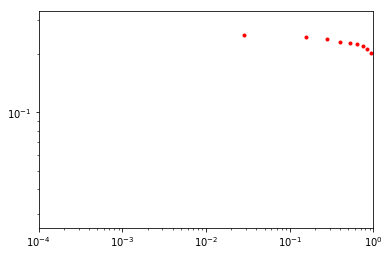

0.0


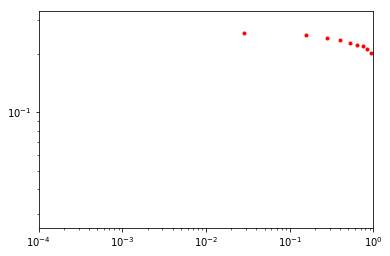

0.0


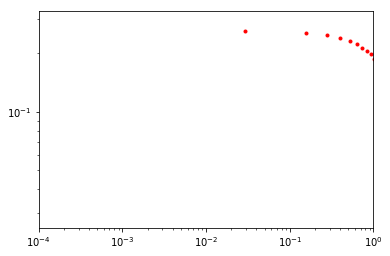

0.0


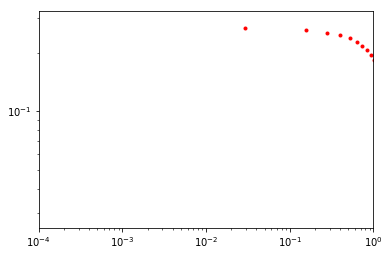

0.0


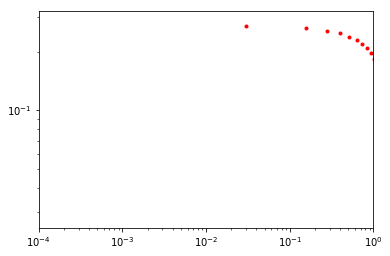

0.0


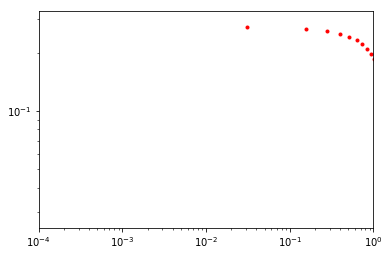

0.0


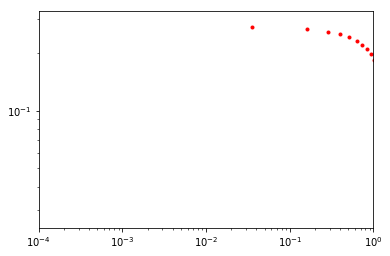

0.0


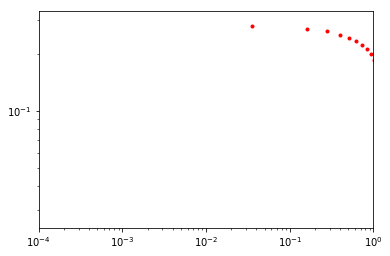

0.0


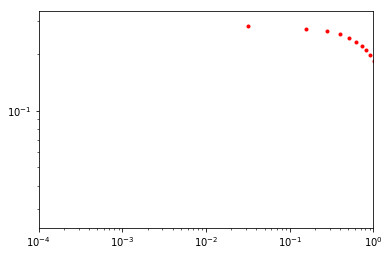

0.0


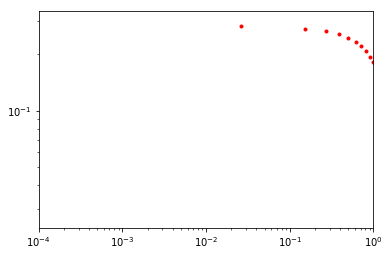

0.0


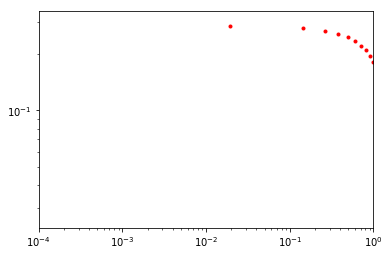

0.0


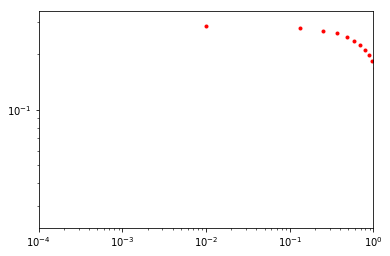

0.0


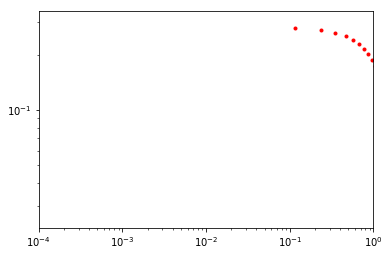

0.0


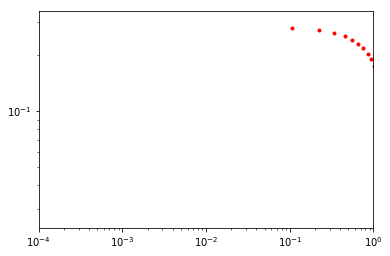

0.0


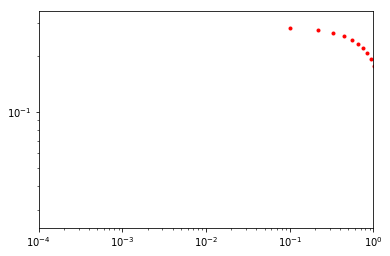

0.0


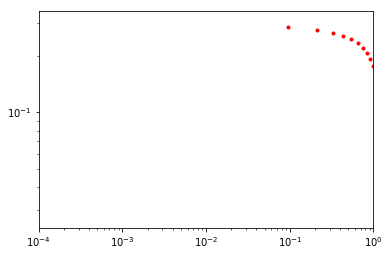

0.0


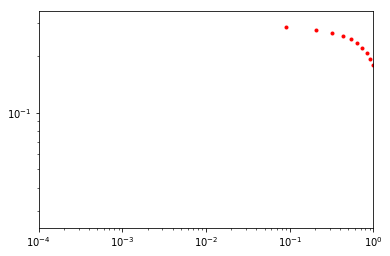

0.0


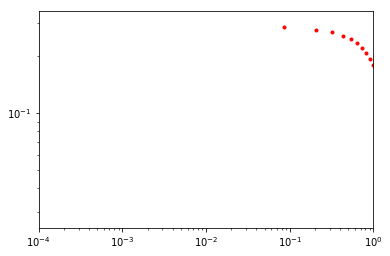

0.0


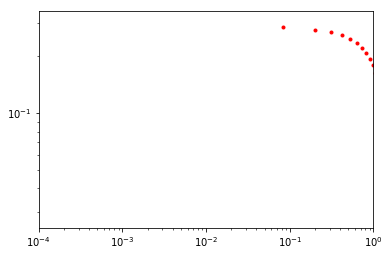

0.0


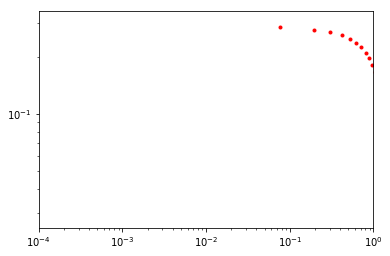

0.0


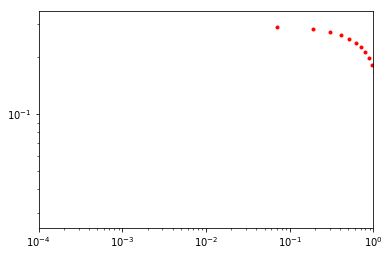

0.0


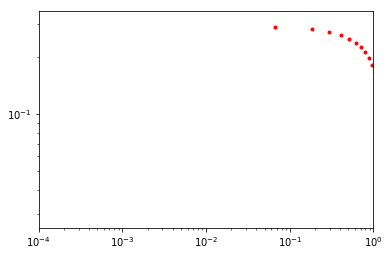

0.0


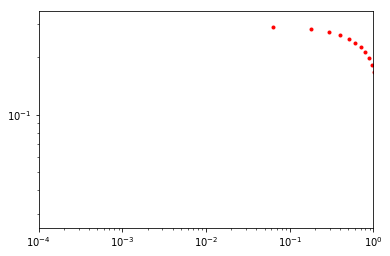

0.0


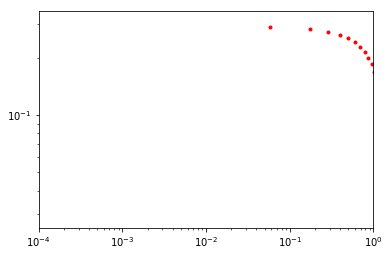

0.0


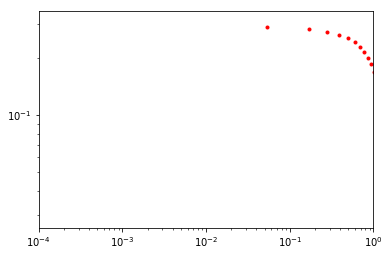

0.0


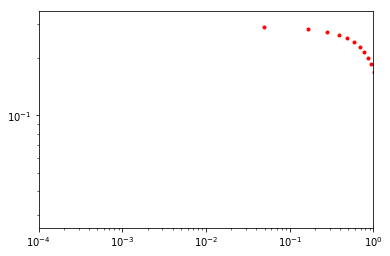

0.0


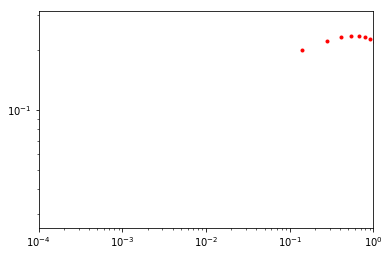

0.0


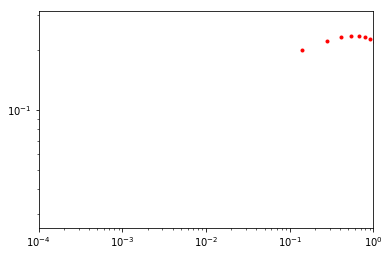

0.0


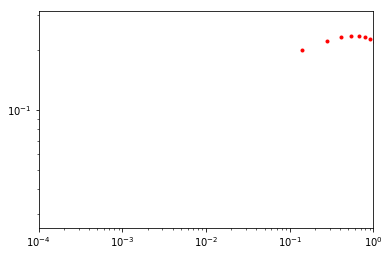

0.0


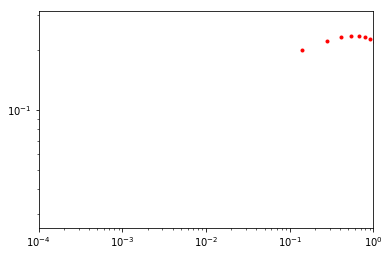

0.0


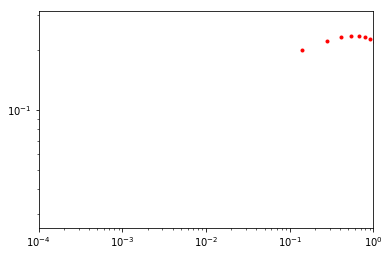

0.0


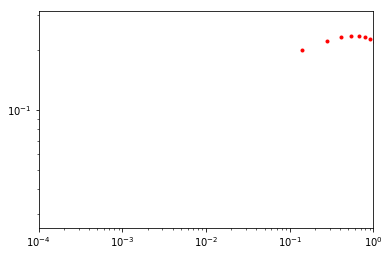

0.0


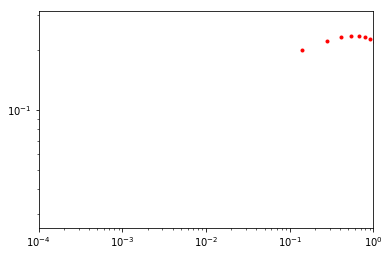

0.0


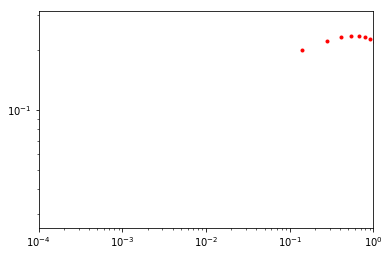

0.0


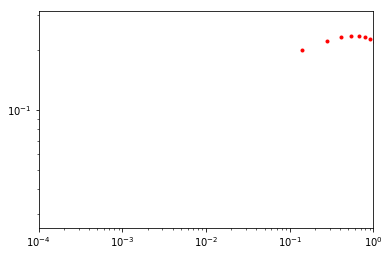

0.0


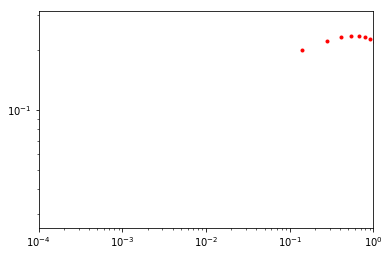

0.0


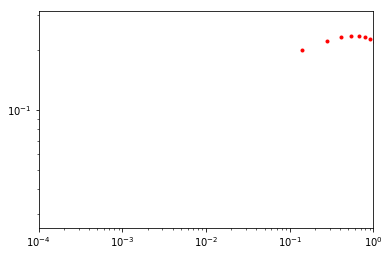

0.0


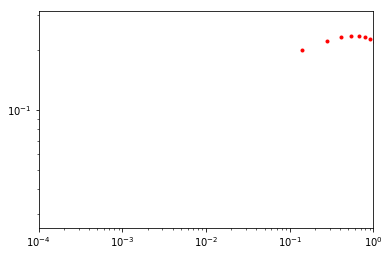

0.0


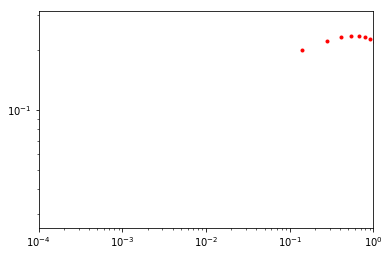

0.0


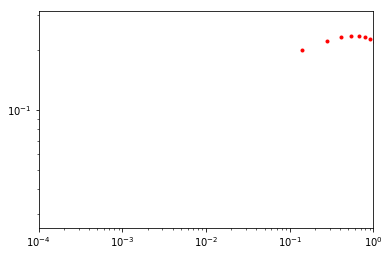

0.0


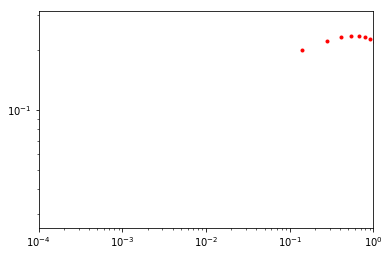

0.0


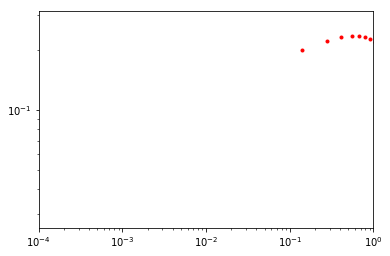

0.0


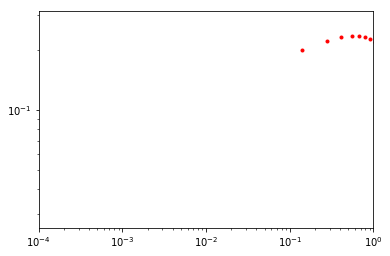

0.0


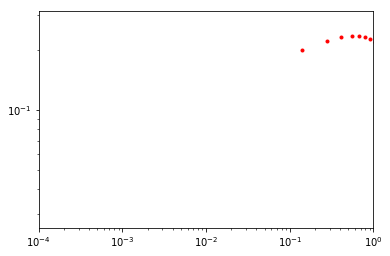

0.0


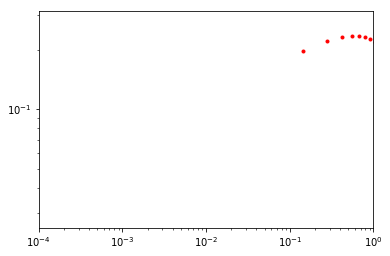

0.0


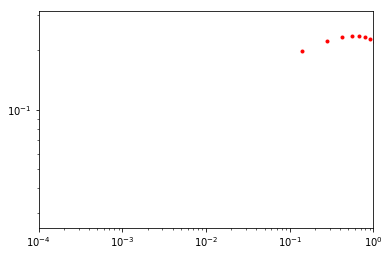

0.0


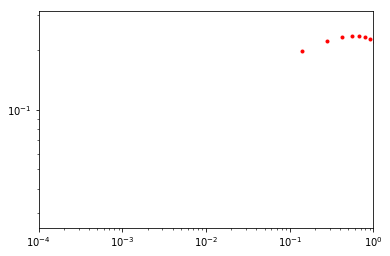

0.0


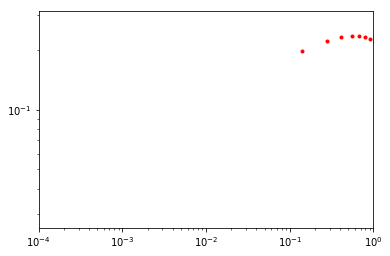

0.0


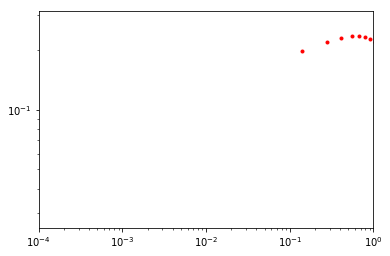

0.0


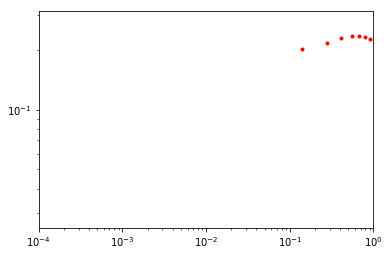

0.0


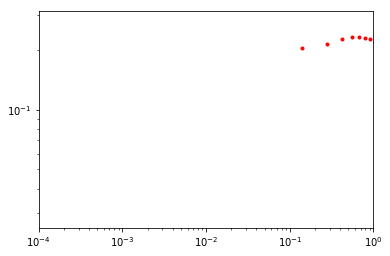

0.0


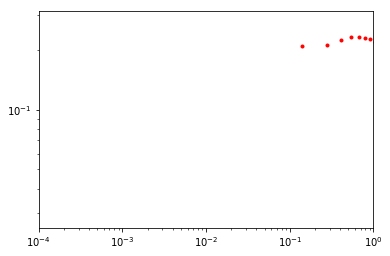

0.0


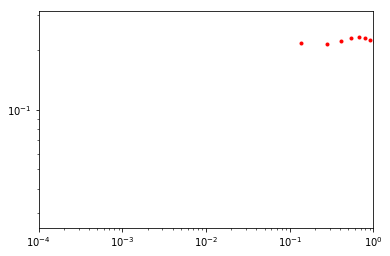

0.0


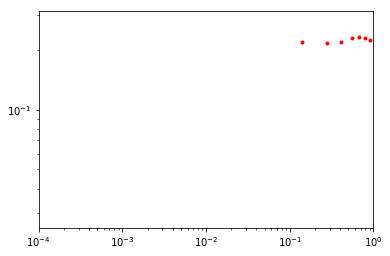

0.0


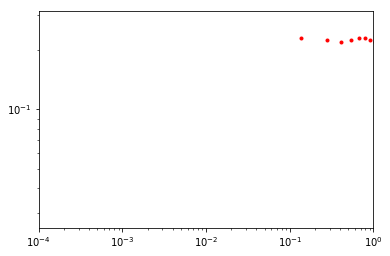

0.0


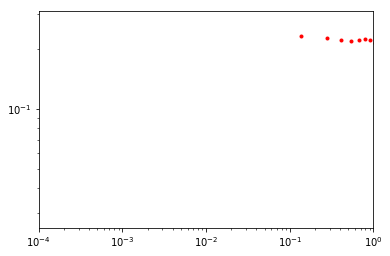

0.0


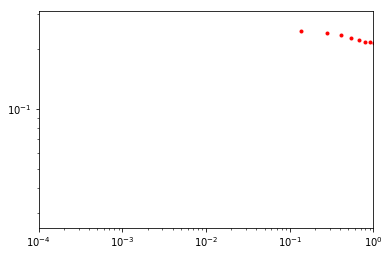

0.0


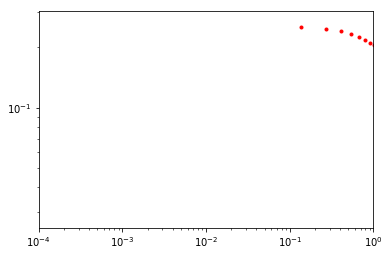

0.0


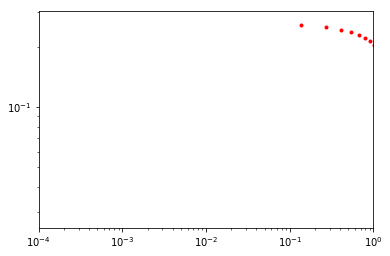

0.0


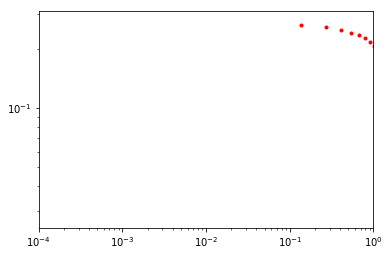

0.0


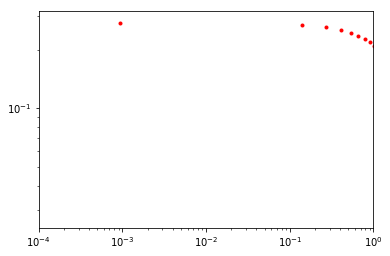

0.0


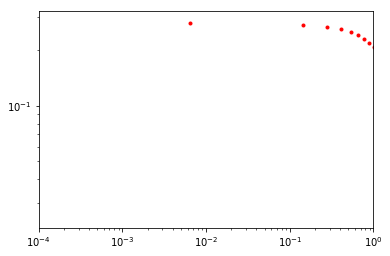

0.0


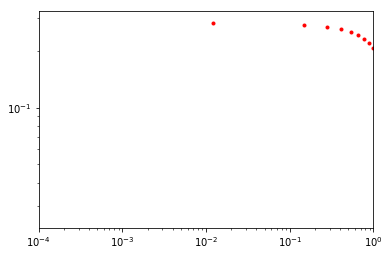

0.0


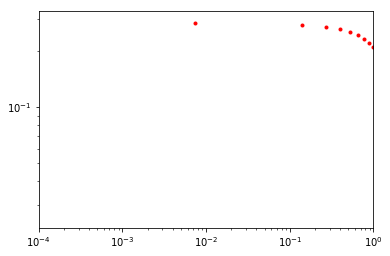

0.0


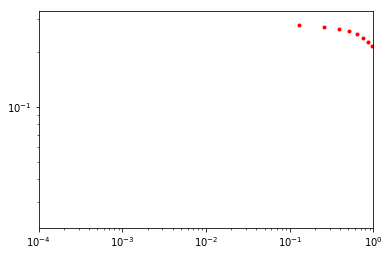

0.0


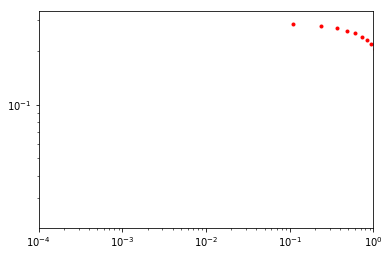

0.0


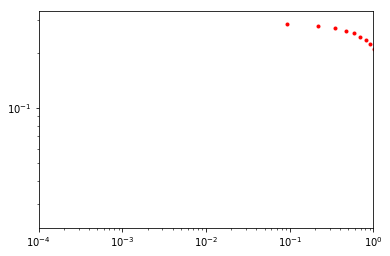

0.0


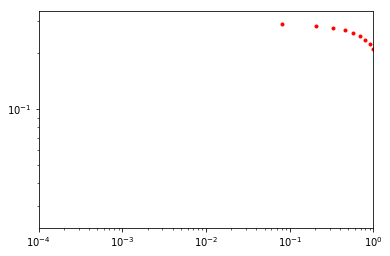

0.0


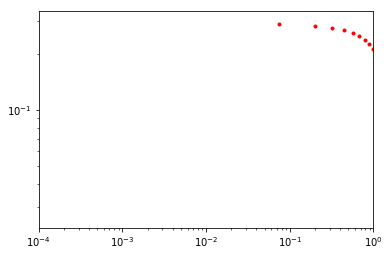

0.0


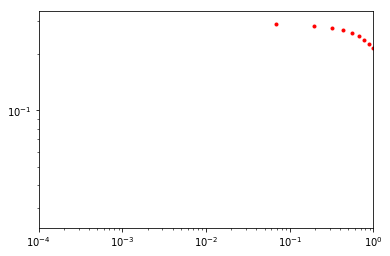

0.0


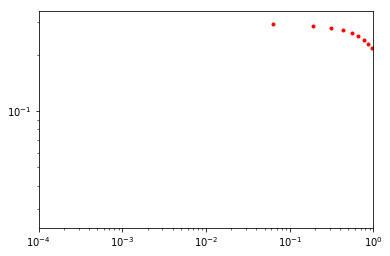

0.0


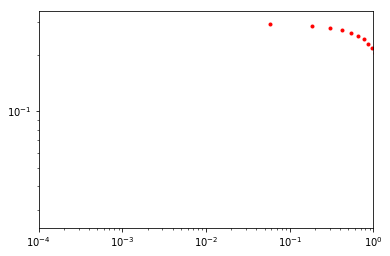

0.0


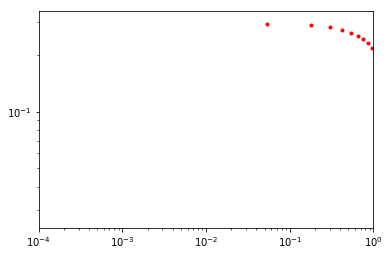

0.0


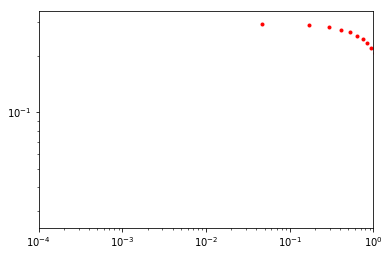

0.0


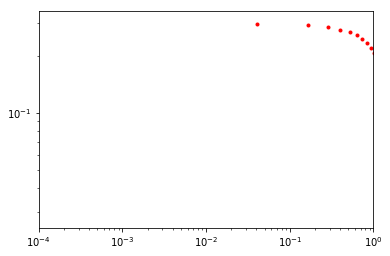

0.0


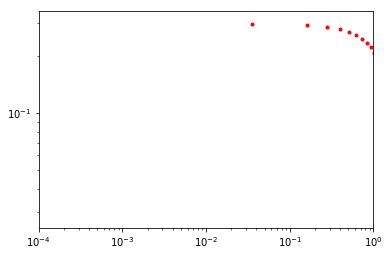

0.0


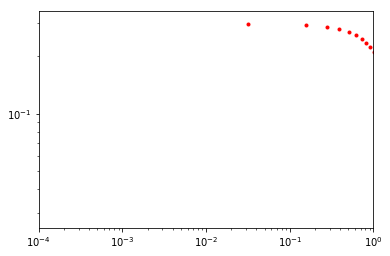

0.0


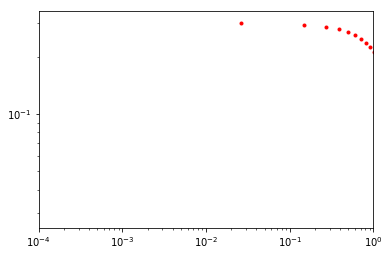

0.0


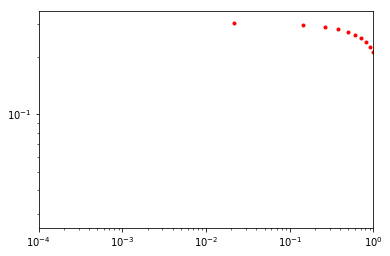

0.0


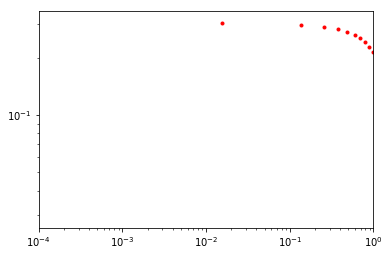

0.0


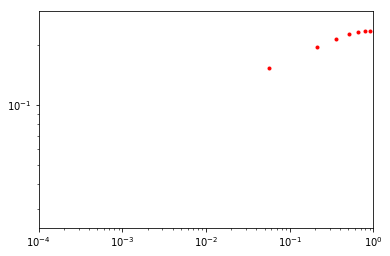

0.0


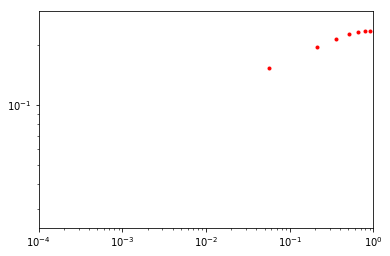

0.0


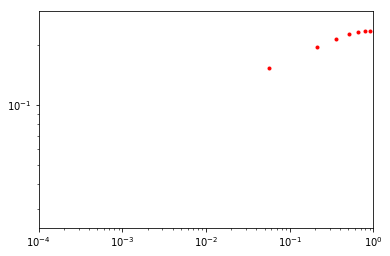

0.0


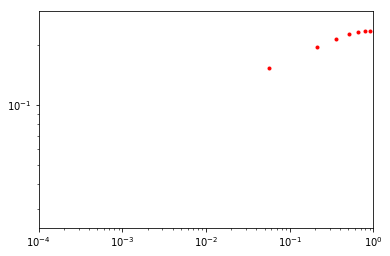

0.0


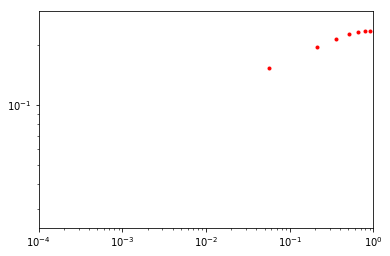

0.0


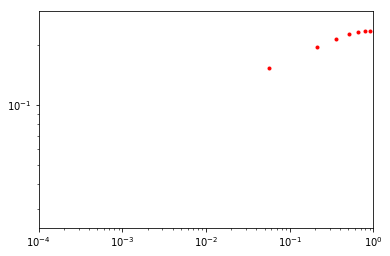

0.0


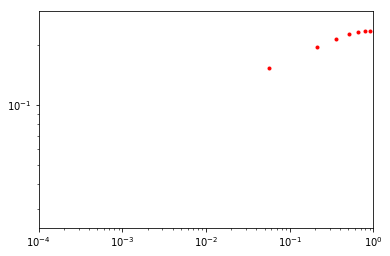

0.0


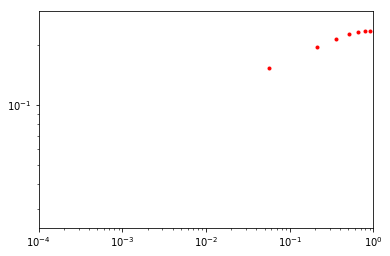

0.0


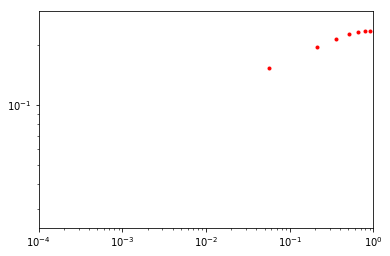

0.0


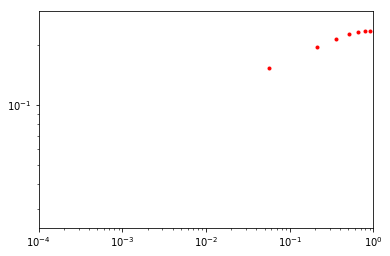

0.0


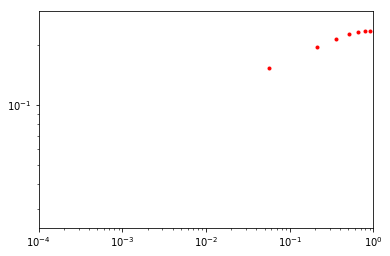

0.0


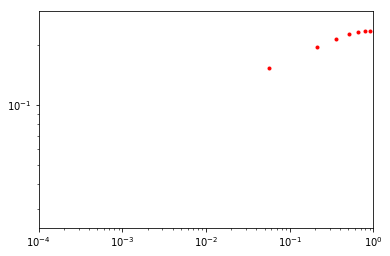

0.0


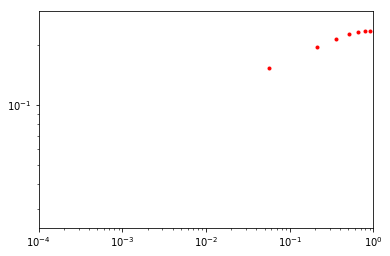

0.0


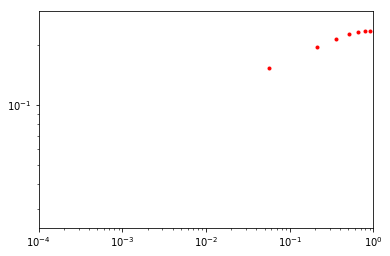

0.0


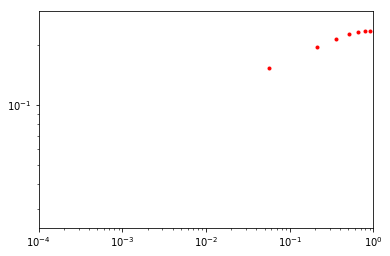

0.0


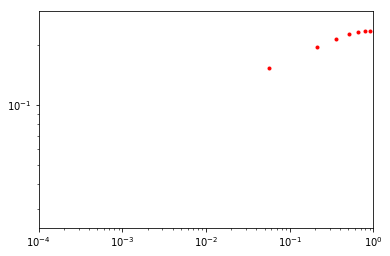

0.0


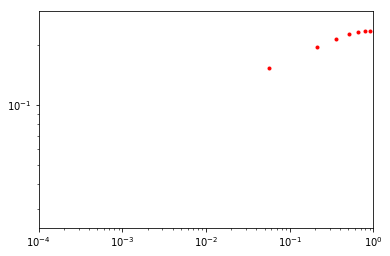

0.0


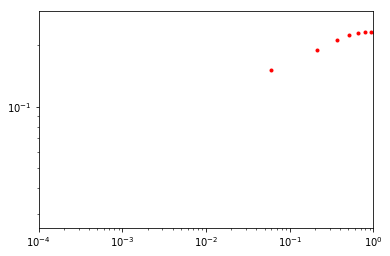

0.0


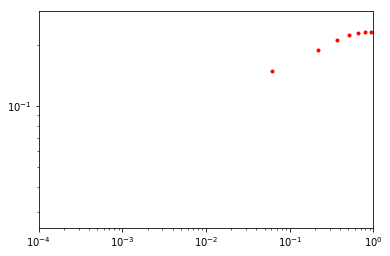

0.0


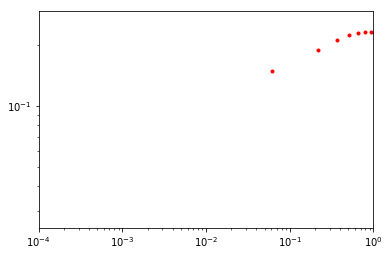

0.0


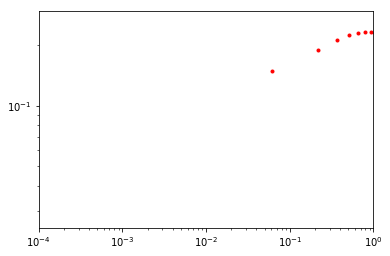

0.0


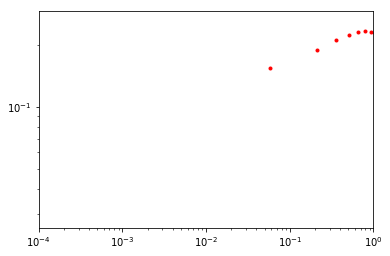

0.0


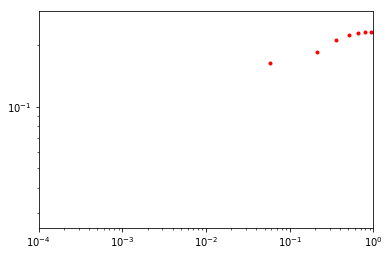

0.0


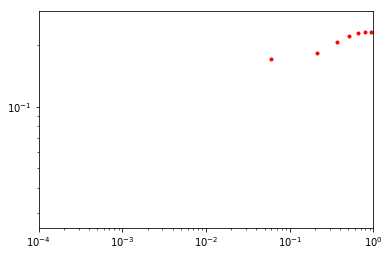

0.0


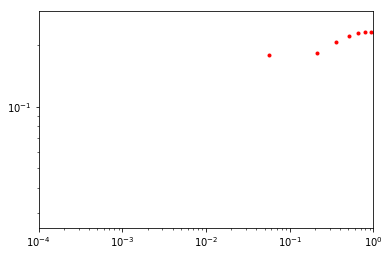

0.0


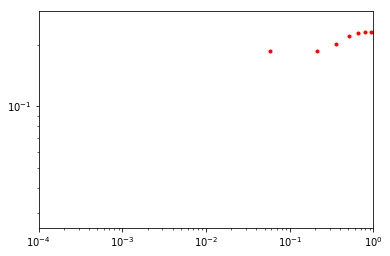

0.0


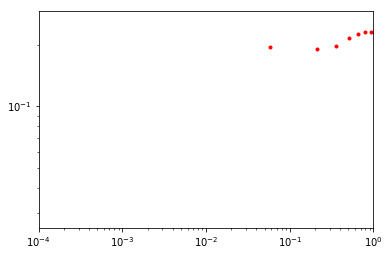

0.0


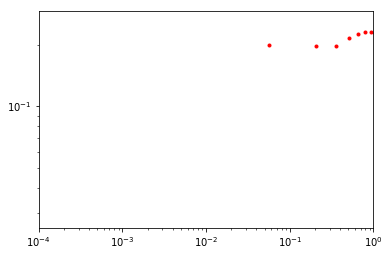

0.0


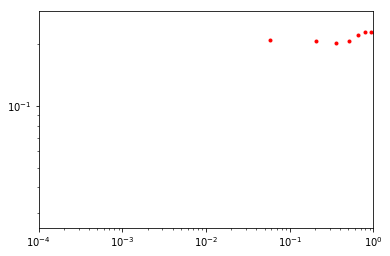

0.0


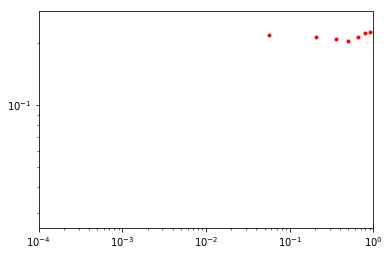

0.0


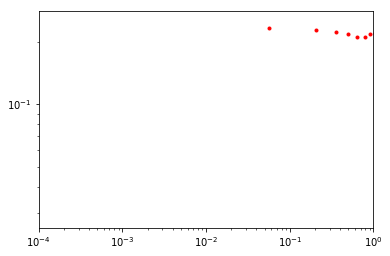

0.0


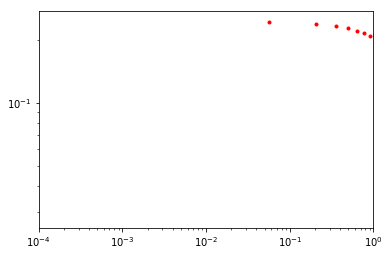

0.0


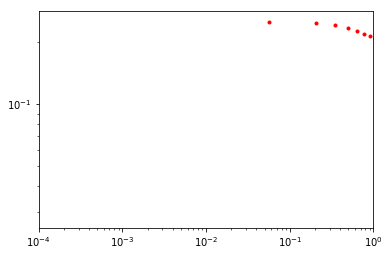

0.0


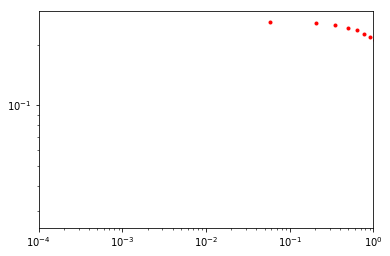

0.0


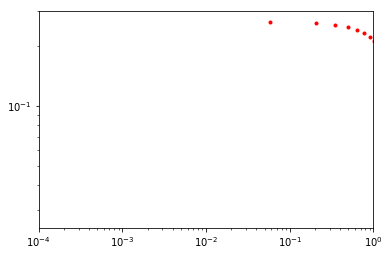

0.0


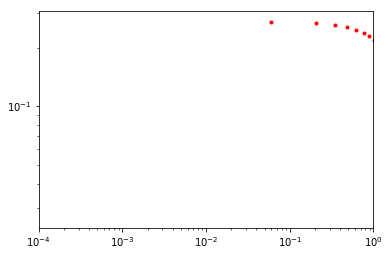

0.0


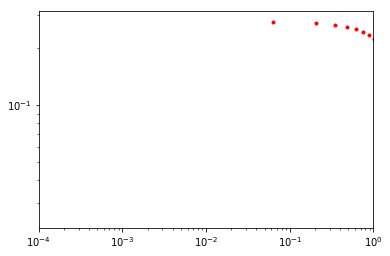

0.0


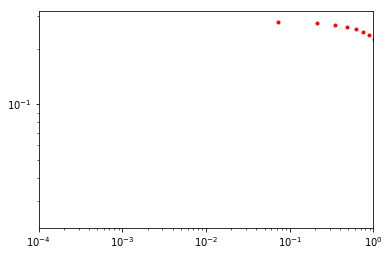

0.0


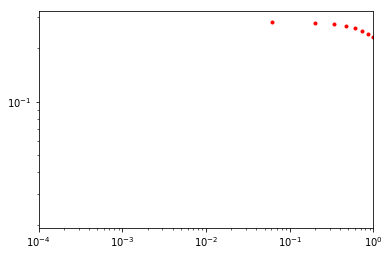

0.0


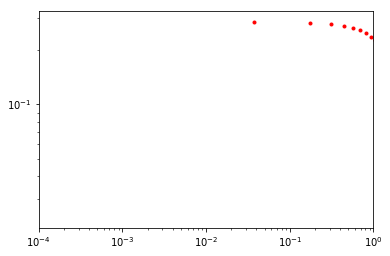

0.0


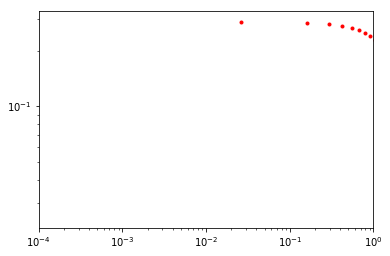

0.0


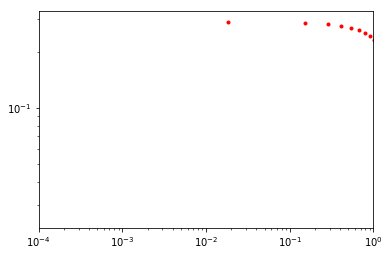

0.0


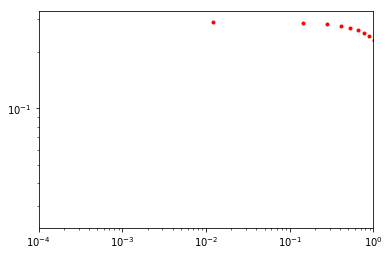

0.0


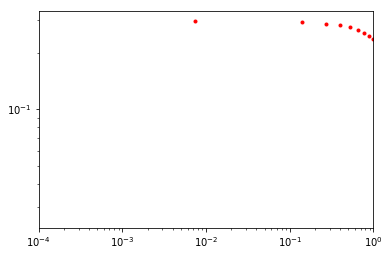

0.0


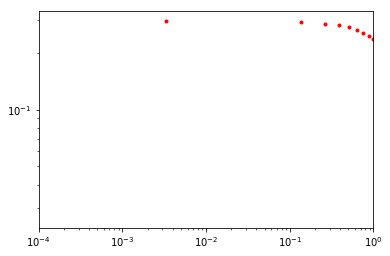

0.0


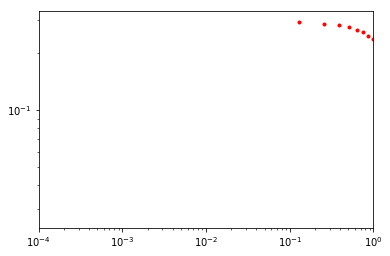

0.0


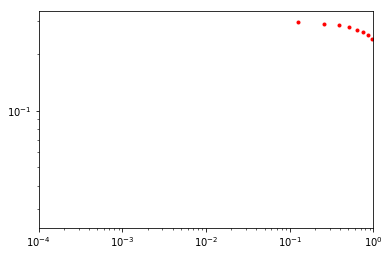

0.0


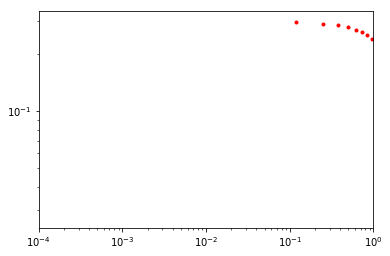

0.0


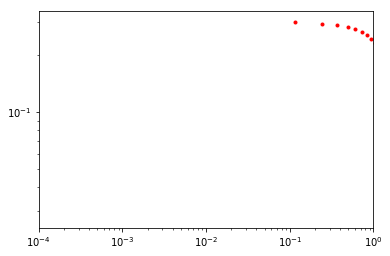

0.0


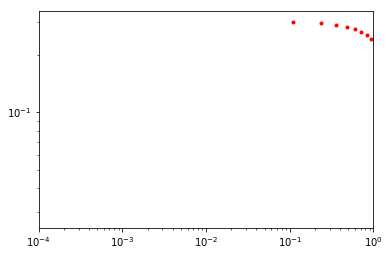

0.0


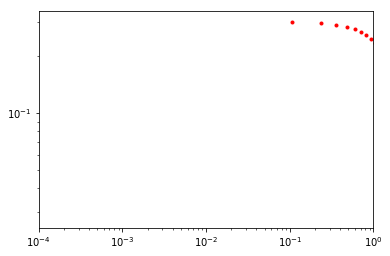

0.0


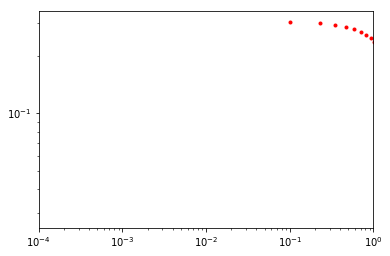

0.0


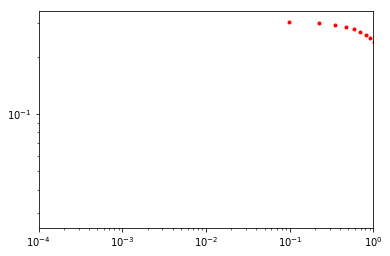

0.0


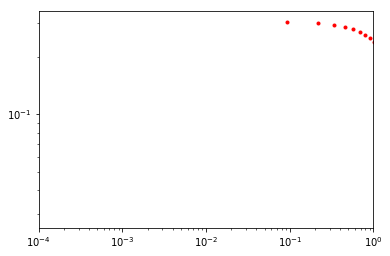

In [16]:
LDOS_Array100_U00 = []
LDOS_Array100_U01 = []
LDOS_Array100_U02 = []
LDOS_Array100_U03 = []
LDOS_Array100_U05 = []
LDOS_Array100_U07 = []
LDOS_Array100 = []


for t in t_array:
    data = np.load("Data/Sigma_Cluster_t{}_N100_2ndOrderTrunc.npy".format(t))[-1,:]
    LDOS_Array100.append(Plotit_with_k(data,1,t,100,Quickreturn = True))


for t in t_array:
    data = np.load("Data/Sigma_Cluster_t{}_N100_U0.1_2ndOrderTrunc.npy".format(t))[-1,:]
    LDOS_Array100_U01.append(Plotit_with_k(data,1,t,100,Quickreturn = True))  
for t in t_array:
    data = np.load("Data/Sigma_Cluster_t{}_N100_U0.0_2ndOrderTrunc.npy".format(t))[-1,:]
    LDOS_Array100_U00.append(Plotit_with_k(data,1,t,100,Quickreturn = True))  
for t in t_array:
    data = np.load("Data/Sigma_Cluster_t{}_N100_U0.2_2ndOrderTrunc.npy".format(t))[-1,:]
    LDOS_Array100_U02.append(Plotit_with_k(data,1,t,100,Quickreturn = True))
for t in t_array:
    data = np.load("Data/Sigma_Cluster_t{}_N100_U0.3_2ndOrderTrunc.npy".format(t))[-1,:]
    LDOS_Array100_U03.append(Plotit_with_k(data,1,t,100,Quickreturn = True))
for t in t_array:
    data = np.load("Data/Sigma_Cluster_t{}_N100_U0.5_2ndOrderTrunc.npy".format(t))[-1,:]
    LDOS_Array100_U05.append(Plotit_with_k(data,1,t,100,Quickreturn = True))
for t in t_array:
    data = np.load("Data/Sigma_Cluster_t{}_N100_U0.7_2ndOrderTrunc.npy".format(t))[-1,:]
    LDOS_Array100_U07.append(Plotit_with_k(data,1,t,100,Quickreturn = True))

    
LDOS_Array100 = np.array(LDOS_Array100)
LDOS_Array100_U00 = np.array(LDOS_Array100_U00)
LDOS_Array100_U01 = np.array(LDOS_Array100_U01)
LDOS_Array100_U02 = np.array(LDOS_Array100_U02)
LDOS_Array100_U03 = np.array(LDOS_Array100_U03)
LDOS_Array100_U05 = np.array(LDOS_Array100_U05)
LDOS_Array100_U07 = np.array(LDOS_Array100_U07)



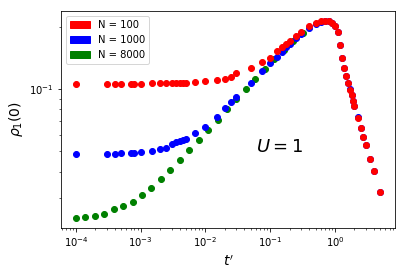

In [35]:
plt.plot(t_array_8000,LDOS_Array8000,"go")
plt.plot(t_array,LDOS_Array1000,"bo")
plt.plot(t_array,LDOS_Array100,"red",marker = "o",linestyle = "none")
plt.xscale("log")
plt.yscale("log")
plt.ylabel(r"$\rho_1(0)$",fontsize = 14)
plt.xlabel(r"$t^\prime$",fontsize = 14)

Rot = mpat.Patch(color = "red",label = "N = 100")
Blau = mpat.Patch(color = "blue",label = "N = 1000")
Grun = mpat.Patch(color = "green",label = "N = 8000")

plt.legend(handles = [Rot,Blau,Grun])
plt.text(0.06,0.05,r"$U = 1$",fontsize = 18)
#plt.savefig("Different_N_LDOS_Boundary.png",dpi = 1000)
plt.show()

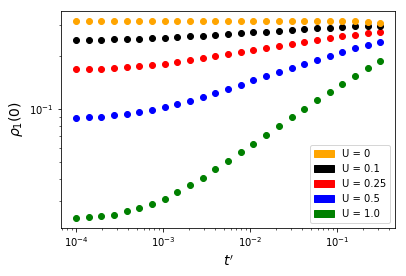

In [37]:
plt.plot(t_array_8000,LDOS_Array8000,"go")
plt.plot(t_array_8000,LDOS_Array8000_U05_MuU,"bo")
plt.plot(t_array_8000,LDOS_Array8000_U025_MuU,"ro")
plt.plot(t_array_8000,LDOS_Array8000_U01_MuU,"black",marker = "o",linestyle = "none")
plt.plot(t_array_8000,LDOS_Array8000_U0_MuU,"orange",marker = "o",linestyle = "none")

plt.xscale("log")
plt.yscale("log")
plt.ylabel(r"$\rho_1(0)$",fontsize = 14)
plt.xlabel(r"$t^\prime$",fontsize = 14)

Schwarz= mpat.Patch(color = "black",label = "U = 0.1")
Rot = mpat.Patch(color = "red",label = "U = 0.25")
Blau = mpat.Patch(color = "blue",label = "U = 0.5")
Grun = mpat.Patch(color = "green",label = "U = 1.0")
Orange = mpat.Patch(color = "orange",label = "U = 0") 

plt.legend(handles = [Orange,Schwarz,Rot,Blau,Grun])
#plt.ylim(3.*10**-2,3.1*10**-1)
#plt.savefig("LDOS_N8000_4_different_U.png",format = "png",dpi = 1000)
plt.show()

In [64]:
#plt.plot(t_array,LDOS_Array2000,"bo")
plt.plot(t_array,LDOS_Array100,"go")
plt.plot(t_array,LDOS_Array100_U00,"ro")
plt.plot(t_array,LDOS_Array100_U01,"ro")
plt.plot(t_array,LDOS_Array100_U02,"ro")
plt.plot(t_array,LDOS_Array100_U03,"ro")
plt.plot(t_array,LDOS_Array100_U05,"ro")
plt.plot(t_array,LDOS_Array100_U07,"ro")

plt.yscale("log")
#plt.plot(t_array,np.array(t_array)**0.305/3.8)
plt.xscale("log")
plt.text(10**-4,0.7*10**-1,"N = 100",fontsize = 16)
plt.ylabel(r"$\rho_1(0)$",fontsize = 14)
plt.xlabel(r"$t$",fontsize = 14)
plt.show()


plt.plot(t_array,LDOS_Array1000,"bo")
plt.plot(t_array,LDOS_Array1000_U00,"ro")
plt.plot(t_array_small,LDOS_Array1000_U01,"ro")
plt.plot(t_array_small,LDOS_Array1000_U02,"ro")
plt.plot(t_array_small,LDOS_Array1000_U03,"ro")
plt.plot(t_array_small,LDOS_Array1000_U05,"ro")
plt.plot(t_array_small,LDOS_Array1000_U07,"ro")

plt.xscale("log")
plt.yscale("log")
plt.ylabel(r"$\rho_1(0)$",fontsize = 14)
plt.xlabel(r"$t$",fontsize = 14)
plt.text(2*10**-2,4*10**-2,"N = 1000",fontsize = 16)
plt.ylim(3.*10**-2,3.1*10**-1)
#plt.plot(t_array,t_array**0.3/3.8,"black",linestyle = "--")
#plt.text(2.2,0.175,"N = 1000",fontsize = 16)
###plt.savefig("LDOS_PowerLaw_t_N1000_logplot_AllU.png",format = "png",dpi = 800)

plt.show()

ValueError: x and y must have same first dimension, but have shapes (54,) and (44,)

In [91]:
def FittingCurve(x,A,B):
    
    return A*x+B

def FittingCurve2(x,A):
    
    return A*x

0.15846083078643175


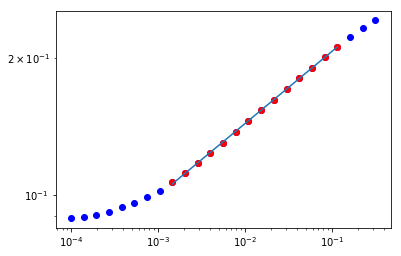

In [83]:
Cut_left = 0.0014
Cut_right = 0.14
x_original= t_array_8000
xdata = x_original[x_original>Cut_left]
xdata = xdata[xdata<Cut_right]

y_original = LDOS_Array8000_U05_MuU
ydata = y_original[x_original>Cut_left]
ydata = ydata[:len(xdata)]

plt.plot(x_original,y_original,"bo")

popt,pcov = scipy.optimize.curve_fit(FittingCurve,np.log(xdata),np.log(ydata))
A05 = popt[0]
print(popt[0])


plt.plot(xdata,ydata,"ro")
plt.xscale("log")
plt.yscale("log")
plt.plot(xdata,np.exp(FittingCurve(np.log(xdata),popt[0],popt[1])))
plt.show()

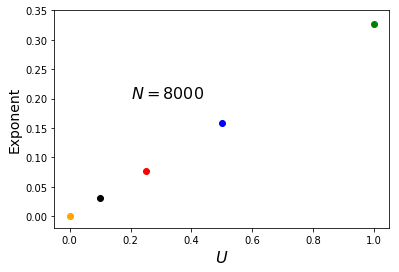

In [98]:
U_vals = np.array([0.0,0.1,0.25,0.5,1])
a_vals = [A00,A01,A025,A05,A1]

#plt.plot(U_vals,a_vals,"bo")

plt.plot(0.0,A00,"orange",marker = "o")
plt.plot(0.1,A01,"black",marker = "o")
plt.plot(0.25,A025,"ro")
plt.plot(0.5,A05,"bo")
plt.plot(1.,A1,"go")




#plt.plot(U_vals,U_vals/np.pi,"r--")
plt.xlabel(r"$U$",fontsize = 16)
plt.ylabel("Exponent",fontsize = 14)
plt.text(0.2,0.2,r"$N=8000$",fontsize = 16)
plt.xlim(-0.05,1.05)
plt.ylim(-0.02,0.35)
popt,pcov = scipy.optimize.curve_fit(FittingCurve2,U_vals,a_vals)
A000 = 1/np.pi
#plt.text(0.0,0.3,"a = {:.3}".format(popt[0]),fontsize = 12)
#plt.plot(U_vals,FittingCurve2(U_vals,popt[0]),"black",linestyle = "--")
#plt.savefig("PowerLawExponent_8000_withoutline_colorized.png",format = "png",dpi = 400)
plt.show()


In [23]:
x = np.array(t_array_8000)
x = np.log(x)
y = np.log(np.array(LDOS_Array8000_U01_MuU))

Diffy = (y[1:]-y[:-1])
Diffx = x[1:]-x[:-1]
y_prime = Diffy/Diffx

plt.plot((x[:-1]+x[1:])/2,y_prime,"ro")
plt.ylim(-0.3,0.5)
plt.text(-5,0.2,"U = 0.1",fontsize = 16)
plt.show()

x = np.array(t_array_8000)
x = np.log(x)
y = np.log(np.array(LDOS_Array8000_U025_MuU))

Diffy = (y[1:]-y[:-1])
Diffx = x[1:]-x[:-1]
y_prime = Diffy/Diffx

plt.plot((x[:-1]+x[1:])/2,y_prime,"ro")
plt.ylim(-0.3,0.5)
plt.text(-5,0.3,"U = 0.25",fontsize = 16)
plt.show()

x = np.array(t_array_8000)
x = np.log(x)
y = np.log(np.array(LDOS_Array8000_U05_MuU))

Diffy = (y[1:]-y[:-1])
Diffx = x[1:]-x[:-1]
y_prime = Diffy/Diffx

plt.plot((x[:-1]+x[1:])/2,y_prime,"ro")
plt.ylim(-0.3,0.5)
plt.text(-8,0.2,"U = 0.5",fontsize = 16)
plt.show()

x = np.array(t_array_8000)
x = np.log(x)
y = np.log(np.array(LDOS_Array8000))

Diffy = (y[1:]-y[:-1])
Diffx = x[1:]-x[:-1]
y_prime = Diffy/Diffx

plt.plot((x[:-1]+x[1:])/2,y_prime,"ro")
plt.ylim(-0.3,0.5)
plt.text(-4,0.02,"U = 1",fontsize = 16)
plt.show()



NameError: name 'LDOS_Array8000_U01_MuU' is not defined

-0.0


C:\Users\robin\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:364: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


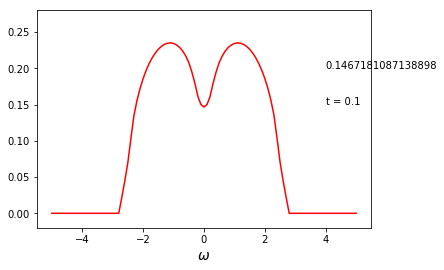

0.0


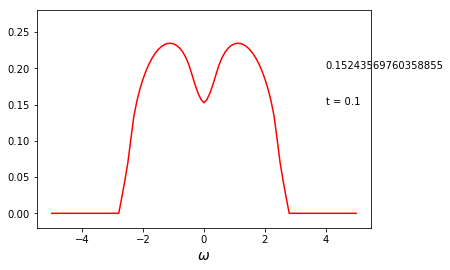

-0.0


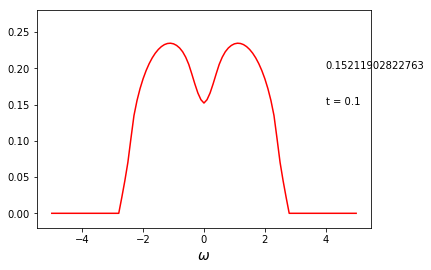

-0.0


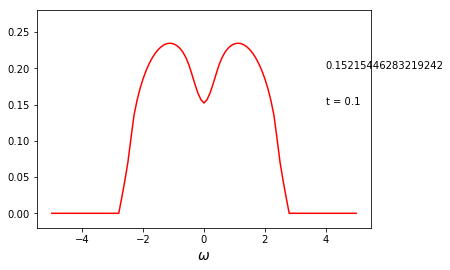

0.0


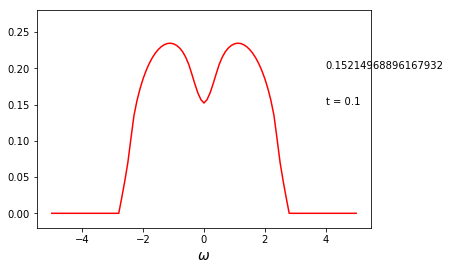

0.0


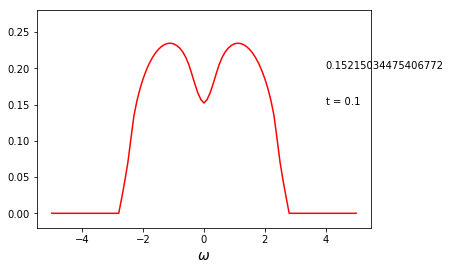

0.0


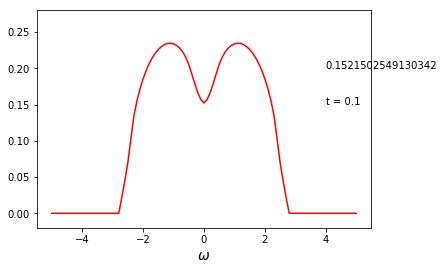

0.0


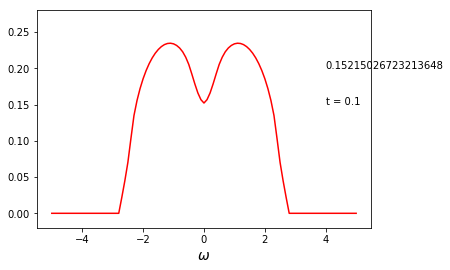

0.0


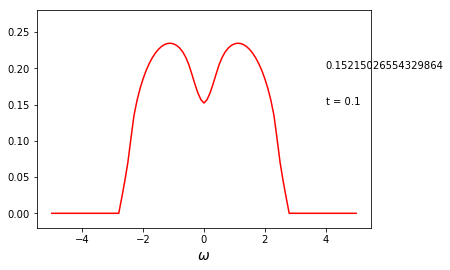

0.0


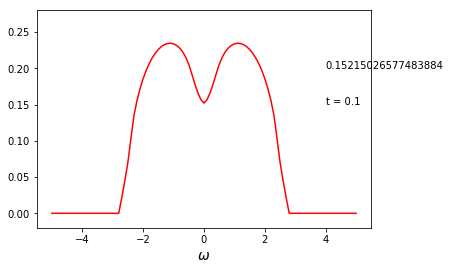

0.15215026577483884

In [12]:
data = np.load("Data/Sigma_Cluster_t0.1_N100.npy")[0,:]
Plotit_with_k(data,1,0.1,100)
data = np.load("Data/Sigma_Cluster_t0.1_N100.npy")[1,:]
Plotit_with_k(data,1,0.1,100)
data = np.load("Data/Sigma_Cluster_t0.1_N100.npy")[2,:]
Plotit_with_k(data,1,0.1,100)
data = np.load("Data/Sigma_Cluster_t0.1_N100.npy")[3,:]
Plotit_with_k(data,1,0.1,100)
data = np.load("Data/Sigma_Cluster_t0.1_N100.npy")[4,:]
Plotit_with_k(data,1,0.1,100)
data = np.load("Data/Sigma_Cluster_t0.1_N100.npy")[5,:]
Plotit_with_k(data,1,0.1,100)
data = np.load("Data/Sigma_Cluster_t0.1_N100.npy")[6,:]
Plotit_with_k(data,1,0.1,100)
data = np.load("Data/Sigma_Cluster_t0.1_N100.npy")[7,:]
Plotit_with_k(data,1,0.1,100)
data = np.load("Data/Sigma_Cluster_t0.1_N100.npy")[8,:]
Plotit_with_k(data,1,0.1,100)
data = np.load("Data/Sigma_Cluster_t0.1_N100.npy")[9,:]
Plotit_with_k(data,1,0.1,100)

In [15]:
t_array = np.array([0,0.01,0.015,0.025,0.05,0.075,0.1,0.125,0.15,0.175,0.2,0.3,1.])
LDOS_Array = []
data = np.load("Sigma_U1_Nrep10_t0_L2000_PHS.npy")[-1,:]
LDOS_Array.append(Plotit_with_k(data,0.,2000,Quickreturn=True))
data = np.load("Sigma_U1_Nrep10_t0komma01_L2000_PHS.npy")[-1,:]
LDOS_Array.append(Plotit_with_k(data,0.01,2000,Quickreturn=True))
data = np.load("Sigma_U1_Nrep10_t0komma015_L2000_PHS.npy")[-1,:]
LDOS_Array.append(Plotit_with_k(data,0.015,2000,Quickreturn=True))
data = np.load("Sigma_U1_Nrep10_t0komma025_L2000_PHS.npy")[-1,:]
LDOS_Array.append(Plotit_with_k(data,0.025,2000,Quickreturn=True))
data = np.load("Sigma_U1_Nrep10_t0komma05_L2000_PHS.npy")[-1,:]
LDOS_Array.append(Plotit_with_k(data,0.05,2000,Quickreturn=True))
data = np.load("Sigma_U1_Nrep10_t0komma075_L2000_PHS.npy")[-1,:]
LDOS_Array.append(Plotit_with_k(data,0.075,2000,Quickreturn=True))
data = np.load("Sigma_U1_Nrep10_t0komma1_L2000_PHS.npy")[-1,:]
LDOS_Array.append(Plotit_with_k(data,0.1,2000,Quickreturn=True))
data = np.load("Sigma_U1_Nrep10_t0komma125_L2000_PHS.npy")[-1,:]
LDOS_Array.append(Plotit_with_k(data,0.125,2000,Quickreturn=True))
data = np.load("Sigma_U1_Nrep10_t0komma15_L2000_PHS.npy")[-1,:]
LDOS_Array.append(Plotit_with_k(data,0.15,2000,Quickreturn=True))
data = np.load("Sigma_U1_Nrep10_t0komma175_L2000_PHS.npy")[-1,:]
LDOS_Array.append(Plotit_with_k(data,0.175,2000,Quickreturn=True))
data = np.load("Sigma_U1_Nrep10_t0komma2_L2000_PHS.npy")[-1,:]
LDOS_Array.append(Plotit_with_k(data,0.2,2000,Quickreturn=True))
data = np.load("Sigma_U1_Nrep10_t0komma3_L2000_PHS.npy")[-1,:]
LDOS_Array.append(Plotit_with_k(data,0.3,2000,Quickreturn=True))
data = np.load("Sigma_U1_Nrep10_t1_L2000_PHS.npy")
LDOS_Array.append(Plotit_with_k(data,1.,2000,Quickreturn=True))

0.0
0.0
-0.0
0.0


C:\Users\robin\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  


-0.0
0.0
0.0
0.0
0.0
0.0
-0.0
0.0
-0.0


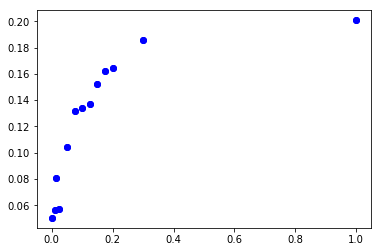

In [17]:
plt.plot(t_array,LDOS_Array,"bo")
plt.show()